# 面積の距離を測り,推定ニューロンの一致度を測る

In [1]:
import csv
from scipy import sparse
import numpy as np

MIN1PIPEの位置情報は左上が0で右下が25500の一次元情報
この位置に直径3~6の円(正確には楕円?)で推定する

min1pipeの位置情報

In [442]:
min1pipe =[]
with open(r"C:\Users\natsu\Desktop\sotsuken\MIN1PIPE\1030conclution\location_min1pipe.csv", encoding='utf-8') as f:
    reader = csv.reader(f)
    [min1pipe.append(i[0]) for i in reader]
    [min1pipe.append(i) for i in reader]

In [443]:
print(min1pipe)
min1pipe[0] = 8176
print("=================")
min1pipe = [int(i) for i in min1pipe]
print(min1pipe)
print("len:",len(min1pipe))
type(min1pipe[1])

['\ufeff8176', '8303', '8474', '20403', '779', '1939', '1271', '2845', '2817', '3586', '4308', '4213', '4274', '5363', '6206', '5628', '6161', '6394', '7456', '7487', '8168', '8393', '8273', '9116', '8861', '9174', '9763', '10797', '10914', '11286', '11728', '12224', '12117', '12710', '13203', '13556', '13577', '13883', '13668', '14083', '14273', '15405', '14655', '15523', '15798', '16026', '16746', '17873', '17415', '17652', '18495', '18699', '19848', '20692', '20368', '21955', '22181', '21890']
[8176, 8303, 8474, 20403, 779, 1939, 1271, 2845, 2817, 3586, 4308, 4213, 4274, 5363, 6206, 5628, 6161, 6394, 7456, 7487, 8168, 8393, 8273, 9116, 8861, 9174, 9763, 10797, 10914, 11286, 11728, 12224, 12117, 12710, 13203, 13556, 13577, 13883, 13668, 14083, 14273, 15405, 14655, 15523, 15798, 16026, 16746, 17873, 17415, 17652, 18495, 18699, 19848, 20692, 20368, 21955, 22181, 21890]
len: 58


int

caimanの位置情報

In [4]:
caiman_location = sparse.load_npz(r"C:\Users\natsu\CaImAn\demos\notebooks\caiman_conclution.npz")

In [5]:
type(caiman_location)
#左上がゼロ,右下が25500の一次元インデックス
n = 1
n = n-1
caiman_location.getcol(n).nonzero() #一次元データなので二つ目は関係なし

(array([ 7536,  7537,  7675,  7676,  7681,  7682,  7683,  7684,  7685,
         7686,  7687,  7688,  7818,  7824,  7825,  7826,  7827,  7828,
         7829,  7830,  7831,  7832,  7833,  7834,  7835,  7836,  7837,
         7838,  7966,  7967,  7968,  7969,  7971,  7972,  7973,  7974,
         7975,  7976,  7977,  7978,  7979,  7980,  7981,  7982,  7983,
         7984,  7985,  7986,  7987,  7988,  8115,  8116,  8117,  8118,
         8119,  8120,  8121,  8122,  8123,  8124,  8125,  8126,  8127,
         8128,  8129,  8130,  8131,  8132,  8133,  8134,  8135,  8136,
         8137,  8138,  8264,  8265,  8266,  8267,  8268,  8269,  8270,
         8271,  8272,  8273,  8274,  8275,  8276,  8277,  8278,  8279,
         8280,  8281,  8282,  8283,  8284,  8285,  8286,  8287,  8288,
         8413,  8414,  8415,  8416,  8417,  8418,  8419,  8420,  8421,
         8422,  8423,  8424,  8425,  8426,  8427,  8428,  8429,  8430,
         8431,  8432,  8433,  8434,  8435,  8436,  8437,  8438,  8563,
      

In [6]:
caiman_location.getcol(n).nonzero()[0]

array([ 7536,  7537,  7675,  7676,  7681,  7682,  7683,  7684,  7685,
        7686,  7687,  7688,  7818,  7824,  7825,  7826,  7827,  7828,
        7829,  7830,  7831,  7832,  7833,  7834,  7835,  7836,  7837,
        7838,  7966,  7967,  7968,  7969,  7971,  7972,  7973,  7974,
        7975,  7976,  7977,  7978,  7979,  7980,  7981,  7982,  7983,
        7984,  7985,  7986,  7987,  7988,  8115,  8116,  8117,  8118,
        8119,  8120,  8121,  8122,  8123,  8124,  8125,  8126,  8127,
        8128,  8129,  8130,  8131,  8132,  8133,  8134,  8135,  8136,
        8137,  8138,  8264,  8265,  8266,  8267,  8268,  8269,  8270,
        8271,  8272,  8273,  8274,  8275,  8276,  8277,  8278,  8279,
        8280,  8281,  8282,  8283,  8284,  8285,  8286,  8287,  8288,
        8413,  8414,  8415,  8416,  8417,  8418,  8419,  8420,  8421,
        8422,  8423,  8424,  8425,  8426,  8427,  8428,  8429,  8430,
        8431,  8432,  8433,  8434,  8435,  8436,  8437,  8438,  8563,
        8564,  8565,

In [410]:
#min1pipe = [int(i) for i in min1pipe]
caiman = [(caiman_location.getcol(n).nonzero()[0]) for n in range(0,61)]


In [412]:
with open('caiman_loc.csv', 'w',newline="") as f:
    writer = csv.writer(f)
    writer.writerows(caiman)

In [411]:
print(len(caiman))
print(len(min1pipe))

61
61
58


# ここまでデータセット用意

 # 点(min1pipe)と点群セット(caiman)の位置を比べる

In [54]:
import numpy as np
def compare(point,points):
    point_x = point/150 
    point_y = point%150
    points_x =[]
    points_y =[]
    D = []
    j = 0
    for i in points:
        points_x.append(int(i/150))
        points_y.append(i%150)           
        X = (points_x[j] - point_x)**2
        Y = (points_y[j] - point_y)**2 
        D.append((X + Y)**(1/2)) 
        j +=1
    return(np.mean(D))     
   

In [55]:
compare(min1pipe[0],caiman[0])

68.01908689478991

In [56]:
#min1pipe,caiman,類似度をlist化
comp=[[ [n,m,compare(min1pipe[n],caiman[m])] for n in range(0,58) ] for m in range(0,60)]

In [57]:
comp[0][0]

[0, 0, 68.01908689478991]

In [58]:
#mumpy化
comp_np = np.array([np.asarray([np.array(compare(min1pipe[n],caiman[m])) for n in range(0,58)]) for m in range(0,60)])

In [59]:
comp_np

array([[ 68.01908689,  45.11177045,  65.97275269, ..., 100.68547311,
        152.61861127, 158.85706448],
       [ 53.15562073,  30.52790577,  51.32046657, ...,  99.98582184,
        144.5511534 , 150.15676619],
       [ 25.26490839,  14.94294725,  24.81337472, ..., 105.27030483,
        131.05378466, 134.95692652],
       ...,
       [ 43.04916852,  62.97275298,  43.65035824, ...,  87.90551926,
         71.78687514,  72.97555628],
       [ 89.33545669, 101.0216374 ,  88.49089208, ...,  62.28910554,
         21.01061368,  27.40091467],
       [ 35.62412941,  31.58585533,  33.94603006, ...,  77.35231563,
        111.44809214, 116.58376632]])

In [60]:
comp_np[0]
comp_np.shape

(60, 58)

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
fig, ax = plt.subplots()
heatmap = ax.pcolor(comp_np, cmap=plt.cm.Blues)

In [17]:
#caiman,min1pipe
print(comp_np.shape)

(60, 58)


In [63]:
#統計データとかのチラ見

print(np.mean(comp_np))
print(np.median(comp_np))
print(np.max(comp_np))
print(np.min(comp_np))
print(np.unravel_index(np.argmin(comp_np), comp_np.shape))

71.61511929913996
69.38744696064994
182.39343518966257
5.67777130375557
(30, 2)


In [64]:
len(min1pipe)

58

In [65]:
len(caiman)

60

In [66]:
min([(compare(min1pipe[0],caiman[n])) for n in range(0,59)])

5.716930624973613

In [67]:
argmin = [ np.argmin([(compare(min1pipe[m],caiman[n])) for n in range(0,60)]) for m in range(0,58)]

In [68]:
"""手早く確認
i = 0
for n in argmin:
    print(i+1,n+1,comp_np[n][i])
    i+=1
"""

'手早く確認\ni = 0\nfor n in argmin:\n    print(i+1,n+1,comp_np[n][i])\n    i+=1\n'

In [70]:
#compareを使いやすくしただけ
def original_distance(m,n):
    """
    m:min1pipe_index,
    n:caiman_index
    """
    point=min1pipe[m]
    points=caiman[n]
    point_x = point/150 
    point_y = point%150
    points_x =[]
    points_y =[]
    D = []
    j = 0
    for i in points:
        points_x.append(int(i/150))
        points_y.append(i%150)           
        X = (points_x[j] - point_x)**2
        Y = (points_y[j] - point_y)**2 
        D.append((X + Y)**(1/2)) 
        j +=1
    return(np.mean(D)) 

In [71]:
d ={1:10,2:20,3:40,4:30}
print(sorted(d.items(), key=lambda x: x[1]))
print(sorted({1:10,3:5}.items(), key=lambda x: x[1]))

[(1, 10), (2, 20), (4, 30), (3, 40)]
[(3, 5), (1, 10)]


{キー: 値 for 任意の変数名 in イテラブルオブジェクト}

In [72]:
#test用
test= {n:original_distance(0,n) for n in range(0,60)} 

In [73]:
original_distance = [{n:original_distance(m,n) for n in range(0,60)} for m in range(0,58)]

In [75]:
print(len(original_distance))

[original_distance[m][0] for m in range(0,58)]

58


[68.01908689478991,
 45.11177044714972,
 65.97275268881761,
 79.00401110169682,
 56.32667644757341,
 138.18370263536974,
 79.6893517913488,
 142.12679082399808,
 115.49944246046721,
 132.15508639014212,
 103.90525691789982,
 30.027226842491793,
 71.98401395821084,
 107.07991627133393,
 50.617962919165905,
 72.69949000440886,
 17.22402638579366,
 87.16296746581267,
 98.19150031013011,
 129.07330979311652,
 60.057469287511,
 134.86240285942247,
 15.847284836681032,
 107.93747038478305,
 7.329871852785995,
 17.104344114852864,
 10.694146767744842,
 139.62328904312218,
 107.00381200930815,
 33.461153942134366,
 29.206447325137606,
 70.25460318498646,
 111.37811911049506,
 105.51122438007386,
 31.49426947526532,
 58.31028349961784,
 76.52570589861412,
 82.80514478598496,
 35.513923429224086,
 130.10511021337376,
 40.902712153212136,
 106.99158420471495,
 104.96976146932646,
 79.6918082474701,
 62.52734574594252,
 127.8453274275599,
 103.33163003176135,
 63.74278155627817,
 59.34946169314948

In [76]:
soted_o_distance = [sorted(original_distance[m].items(),key=lambda x:x[1]) for m in range(0,58)]

In [77]:
soted_o_distance[0][0]

(30, 5.716930624973613)

In [268]:
for n in range(0,57):
    print(n+1,soted_o_distance[n][0],soted_o_distance[n][1],soted_o_distance[n][2],soted_o_distance[n][3],soted_o_distance[n][4])

1 (30, 5.716930624973613) (7, 11.541864925347015) (26, 16.04847402402819) (23, 20.027952846101694) (34, 21.486246636373025)
2 (4, 8.18499132616984) (12, 8.407091863380533) (7, 14.48261548887935) (2, 14.942947251621888) (11, 17.042722914025347)
3 (30, 5.67777130375557) (7, 10.114622078701334) (26, 17.76735097935313) (34, 19.414912357124724) (12, 21.325585888484856)
4 (20, 26.759832544049612) (22, 39.269598265224964) (18, 44.76667814191915) (16, 45.27829738074814) (21, 50.88410758542008)
5 (8, 27.577290333155347) (3, 36.113861192599344) (11, 39.99030813887824) (5, 41.05726231530674) (6, 42.07591999241709)
6 (44, 9.311819905607157) (41, 14.795072998345674) (46, 17.181206343111214) (49, 26.4324777996519) (42, 27.3929350939141)
7 (5, 6.816396352792464) (31, 17.344653265970265) (32, 27.81067245165908) (27, 33.452543950403154) (3, 34.00750386992425)
8 (44, 15.919834981963435) (41, 15.949736440215817) (46, 20.26305035966553) (49, 25.00820024789043) (42, 32.907875185537726)
9 (42, 8.26556850704

In [79]:
#for m in range(0,59):
#    print(soted_o_distance[0][m])

#min1pipeの0番目だけに対して出す
[soted_o_distance[0][m][1] for m in range(0,59)]

[5.716930624973613,
 11.541864925347015,
 16.04847402402819,
 20.027952846101694,
 21.486246636373025,
 21.60186426158932,
 23.79741898038927,
 25.264908390816114,
 25.637260131178454,
 25.85259615078717,
 26.453557036009443,
 28.779793176882304,
 30.01133575661671,
 31.636060297056254,
 33.6725087593364,
 33.90181875760077,
 34.120736362012146,
 35.62412940829222,
 35.830742889703146,
 36.97900895310336,
 37.2438004031492,
 39.36126649051991,
 42.28567280088772,
 42.32960293588371,
 42.9659747899163,
 43.049168522161025,
 44.49282227189908,
 45.93173881891568,
 46.42579874651549,
 46.57500074268581,
 46.913861699766606,
 49.15868554289592,
 52.28194712537648,
 53.15562073209685,
 55.23099147695482,
 56.03124237496791,
 57.45368843529761,
 58.92661193158088,
 59.2572011673261,
 59.305157291678526,
 59.33213968323007,
 63.37125280267805,
 64.03064025810073,
 64.48316711180688,
 66.47015082235966,
 66.78181776031022,
 66.95353862787105,
 68.01908689478991,
 68.54197273126435,
 68.9429572

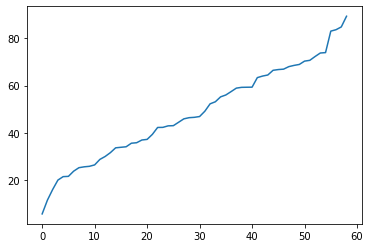

<Figure size 72x72 with 0 Axes>

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt

#min1pipeの0番目とcaimanすべての距離,ソートをそえて

plt.plot([soted_o_distance[0][m][1] for m in range(0,59)])
plt.figure(figsize=(1,1))
plt.show()

#print(n+1,soted_o_distance[n][0],soted_o_distance[n][1],soted_o_distance[n][2],soted_o_distance[n][3])

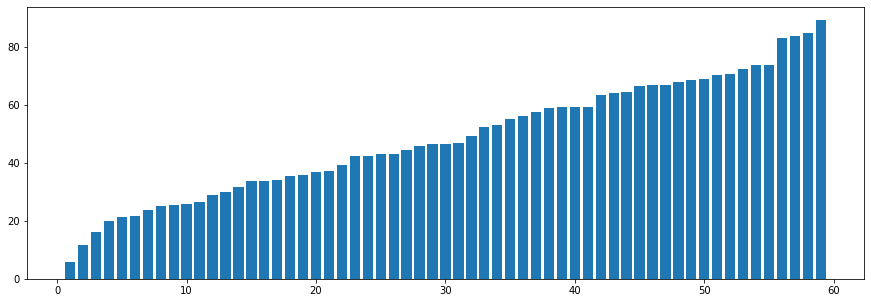

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.bar([m for m in range(1,60)],[soted_o_distance[0][m][1] for m in range(0,59)])
plt.show()

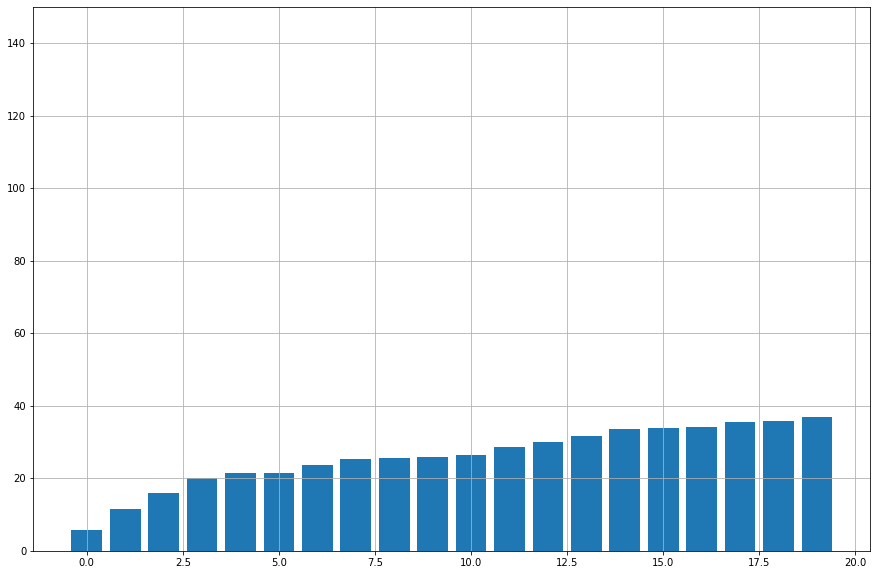

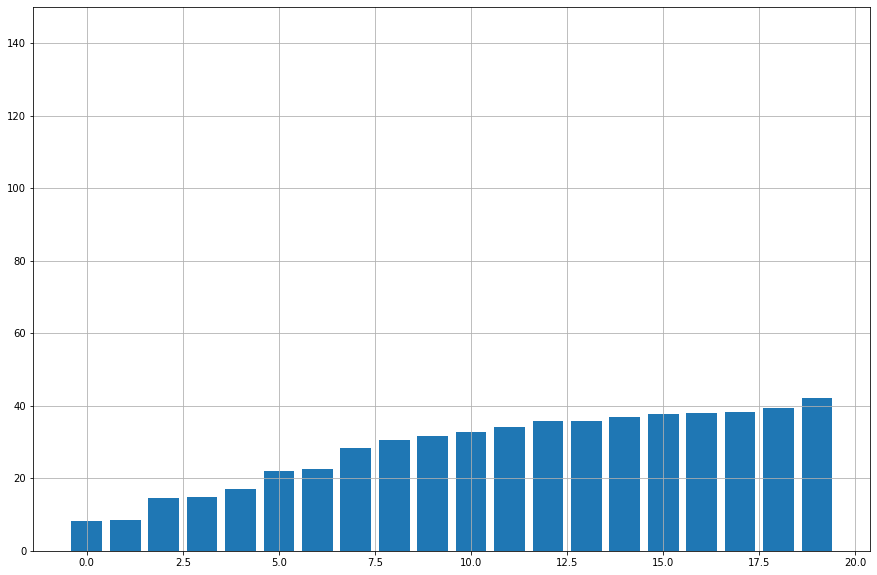

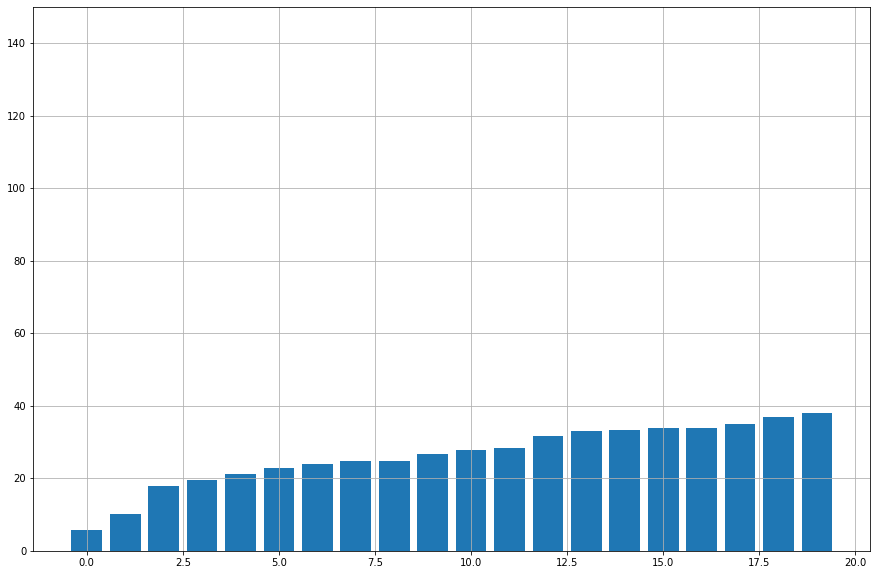

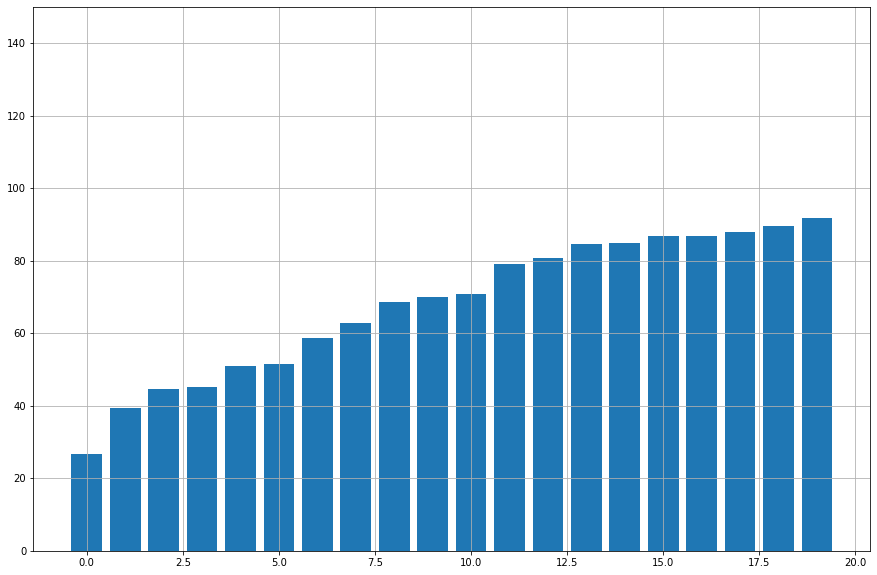

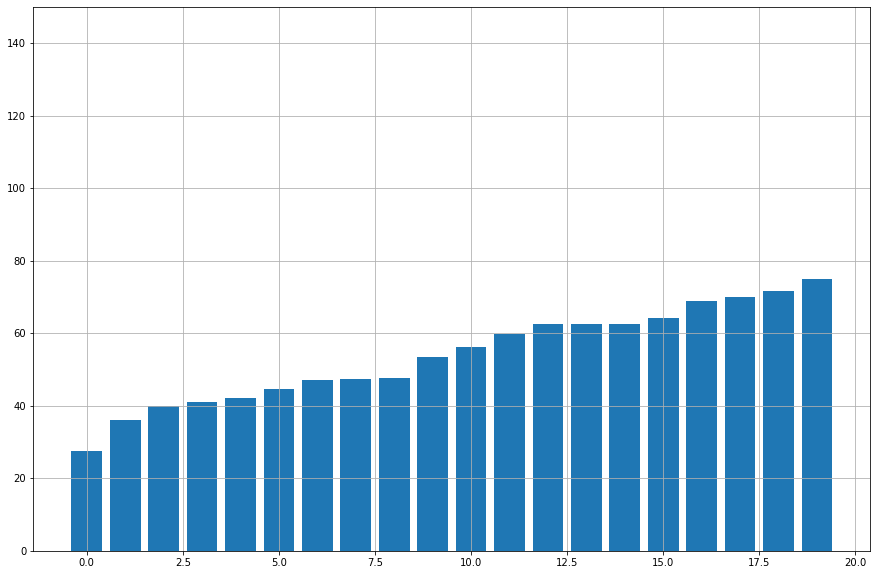

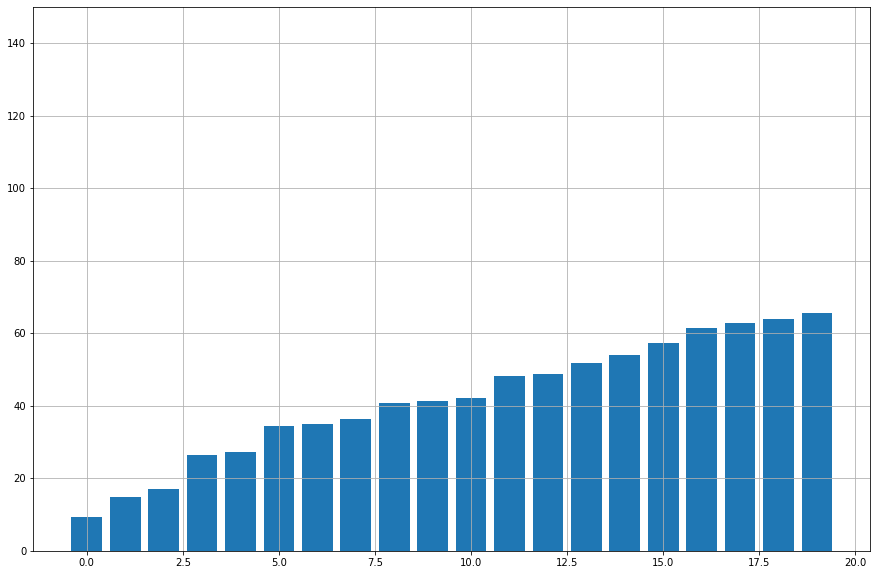

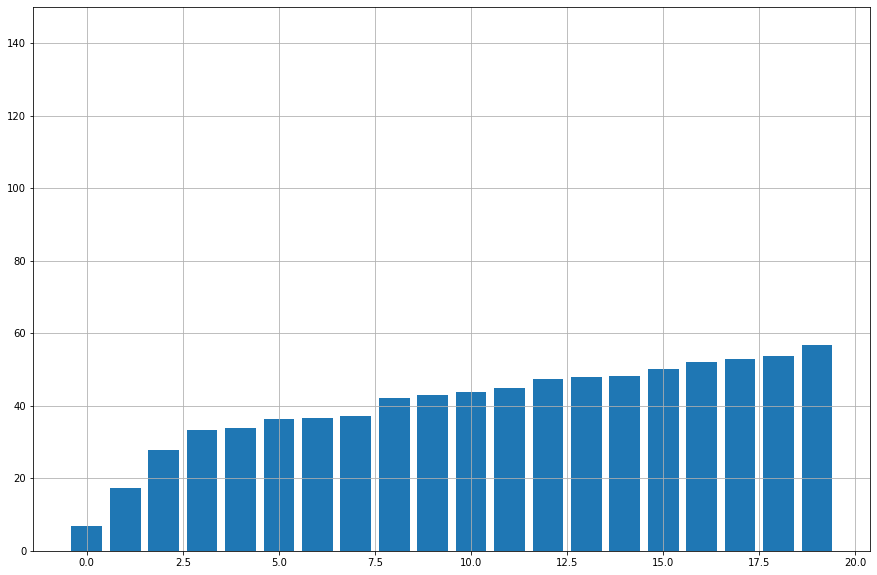

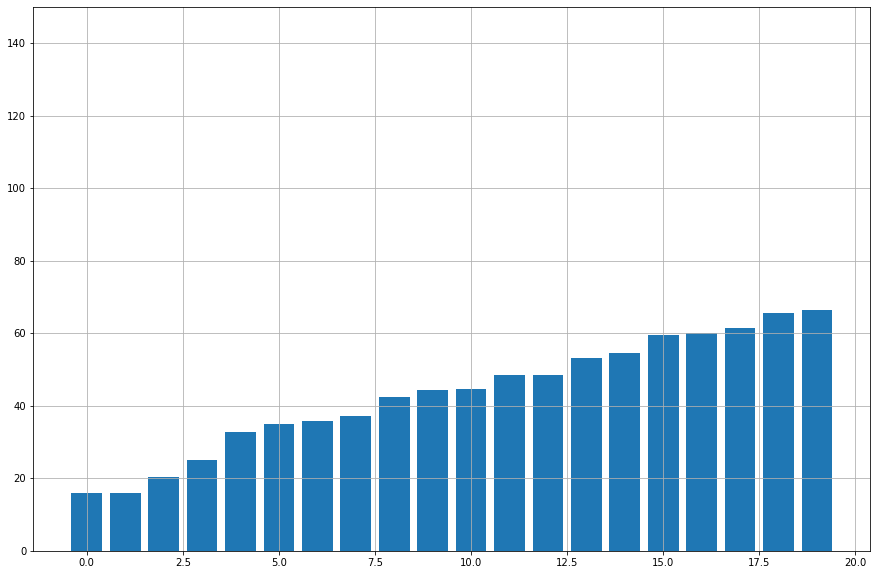

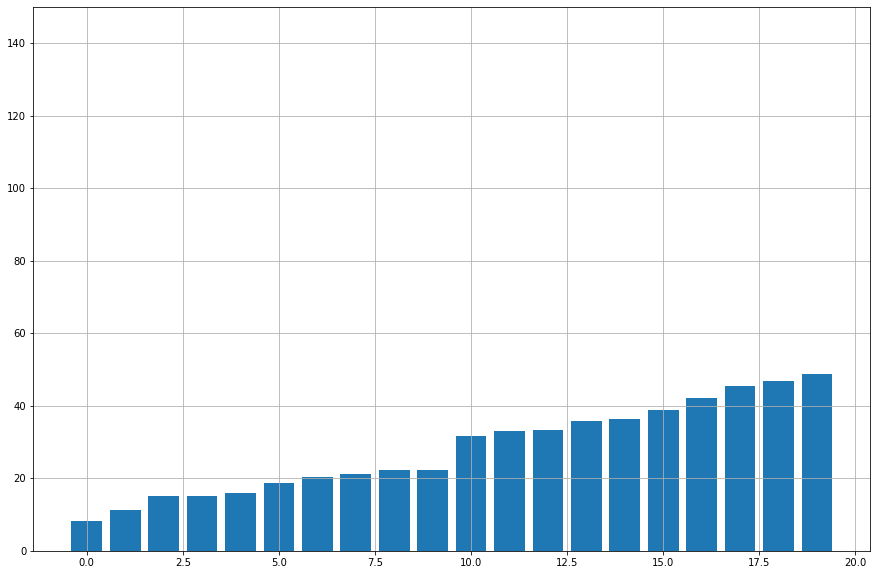

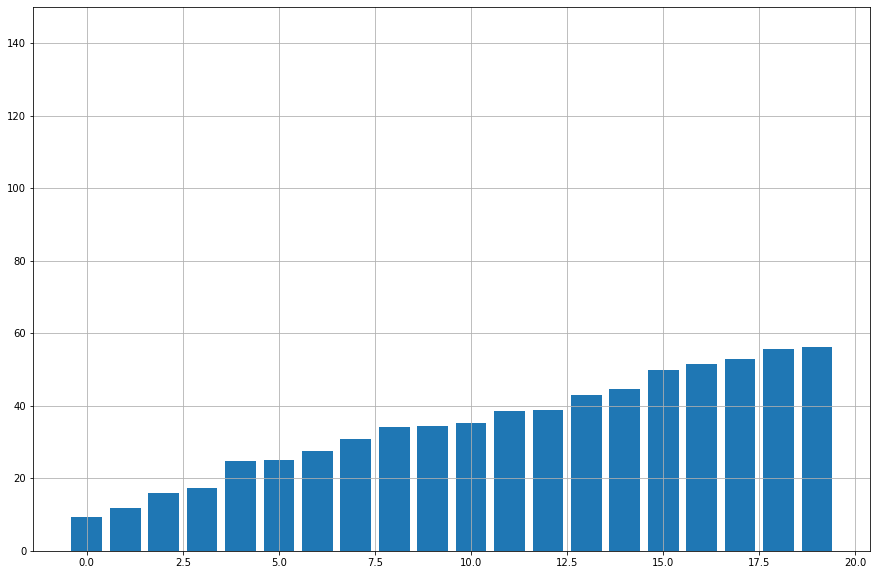

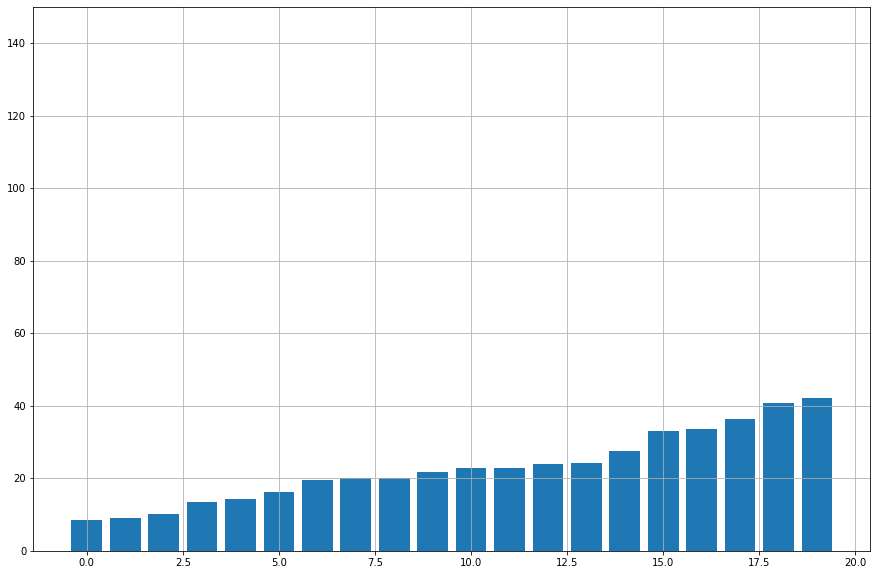

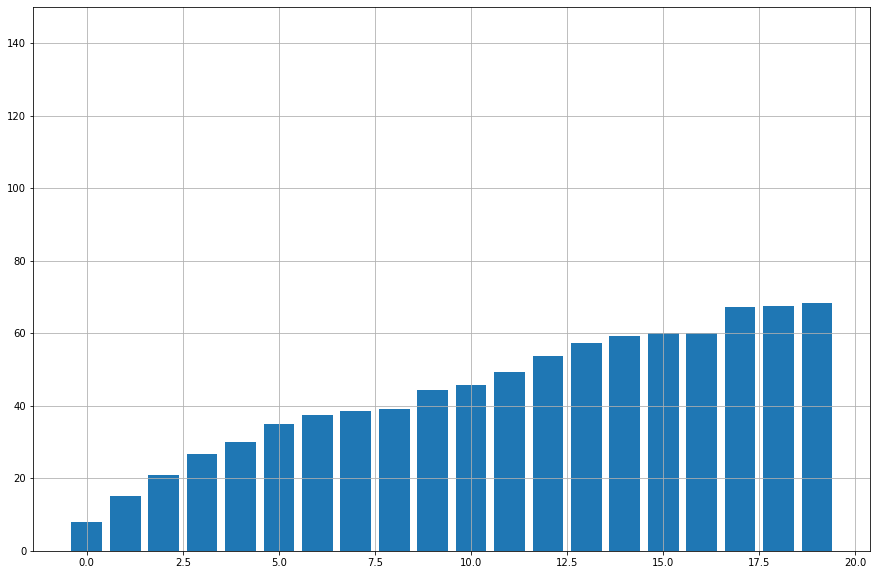

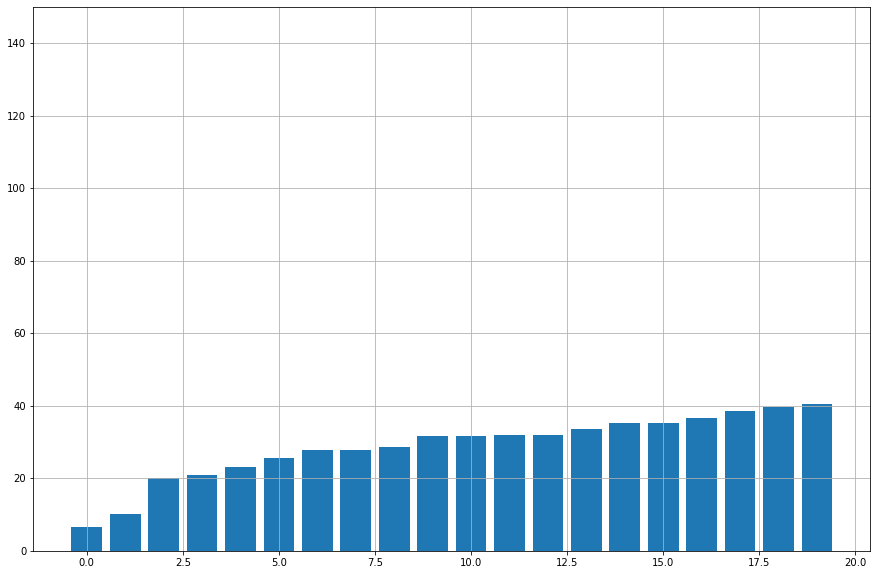

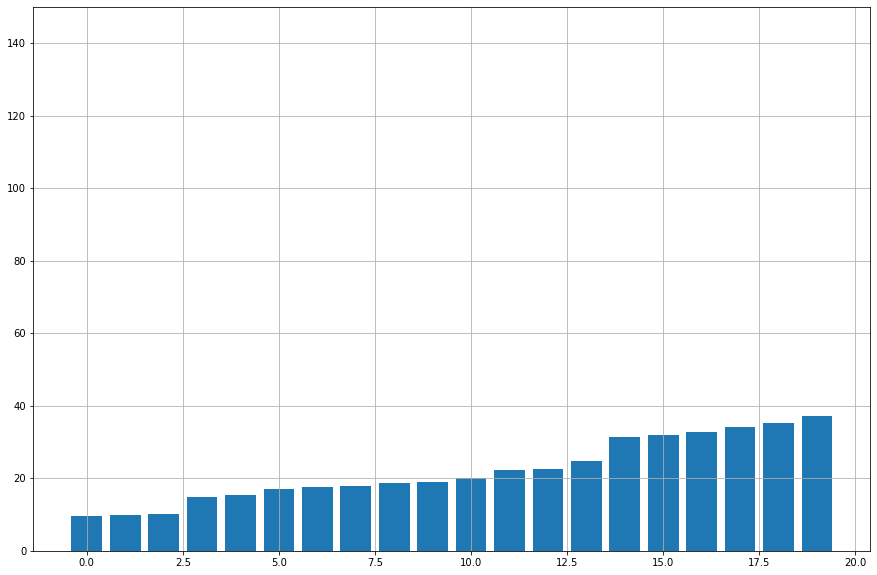

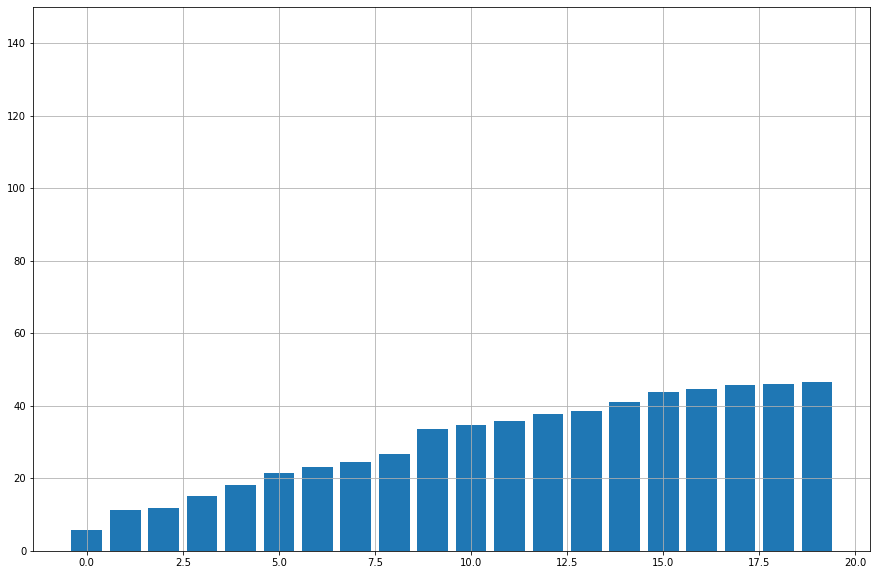

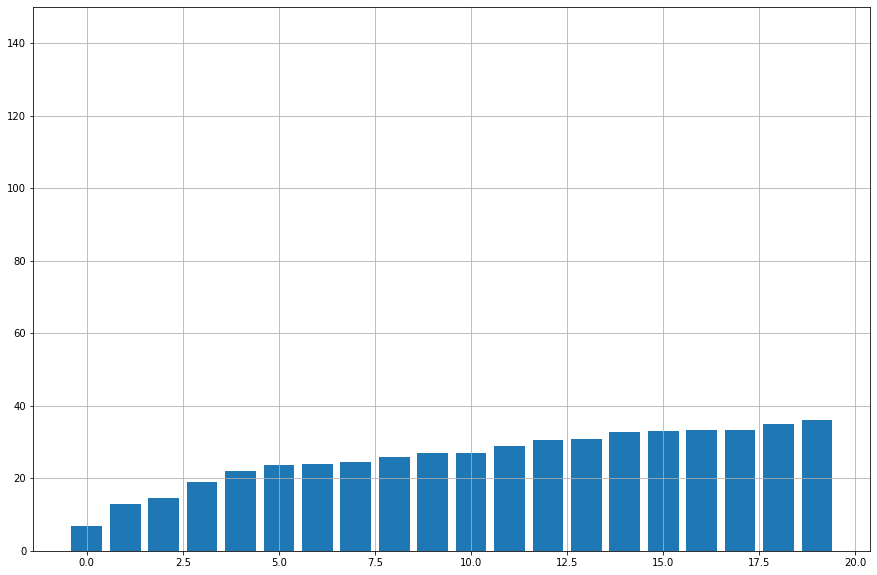

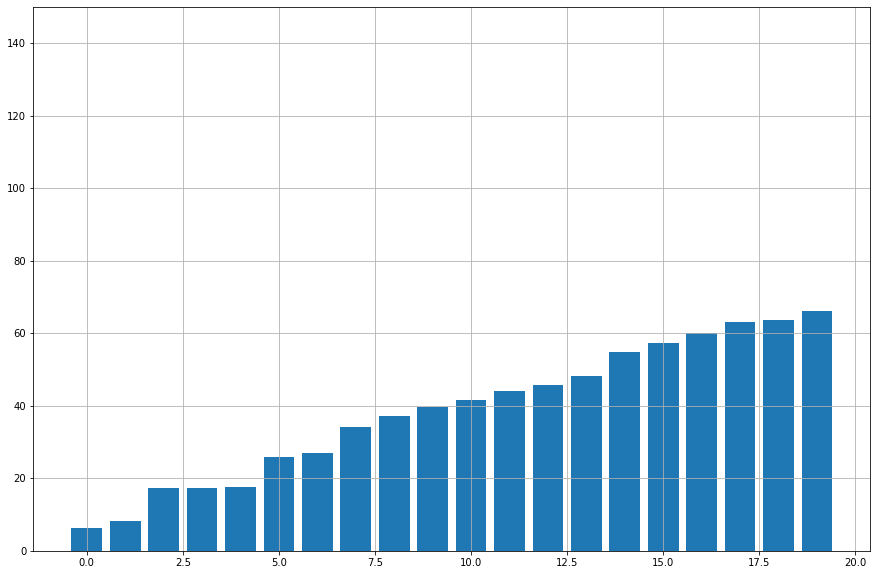

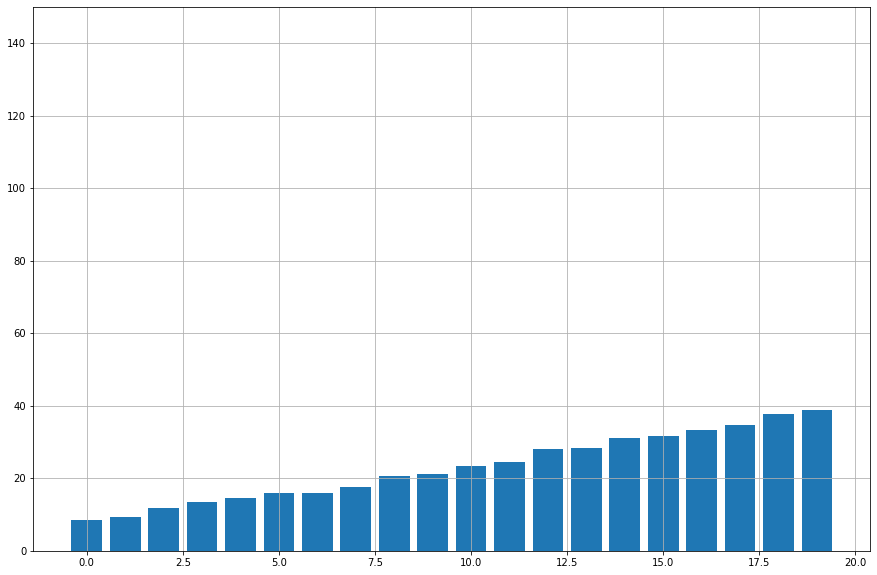

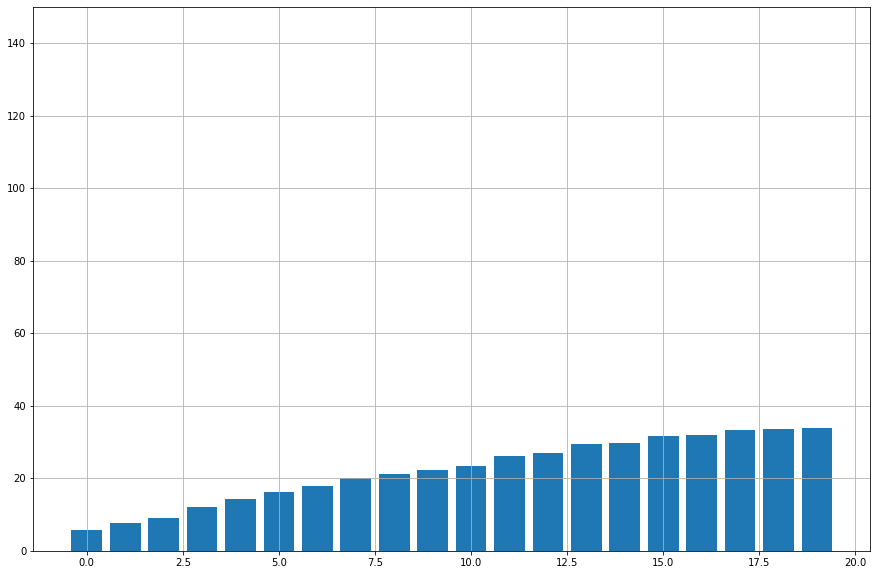

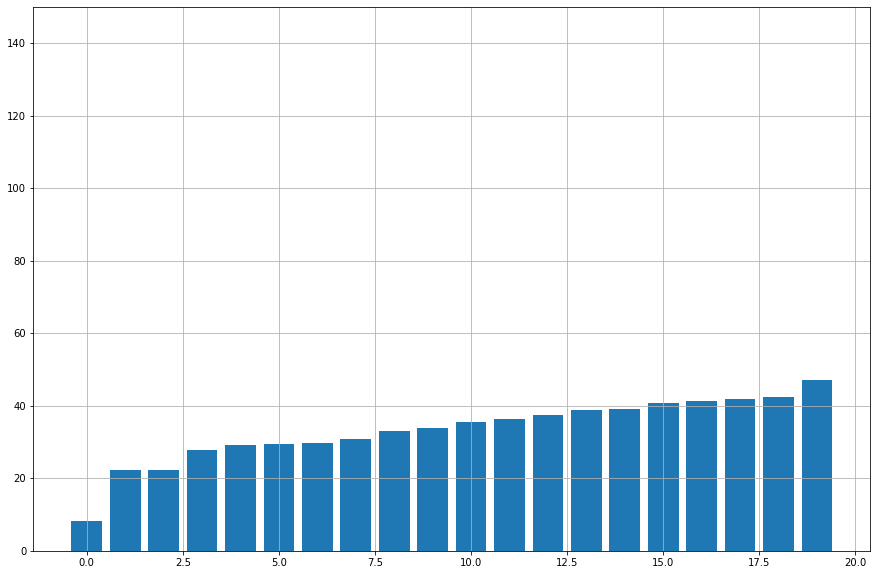

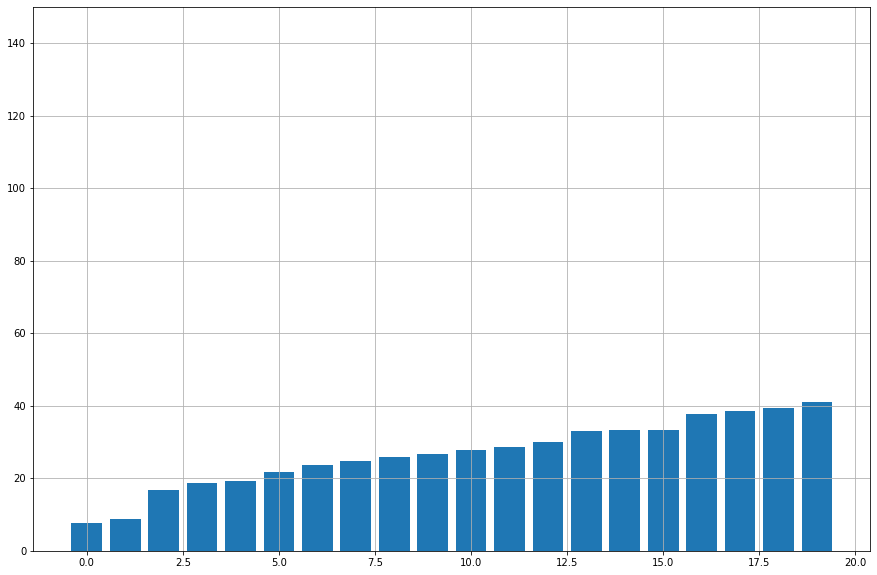

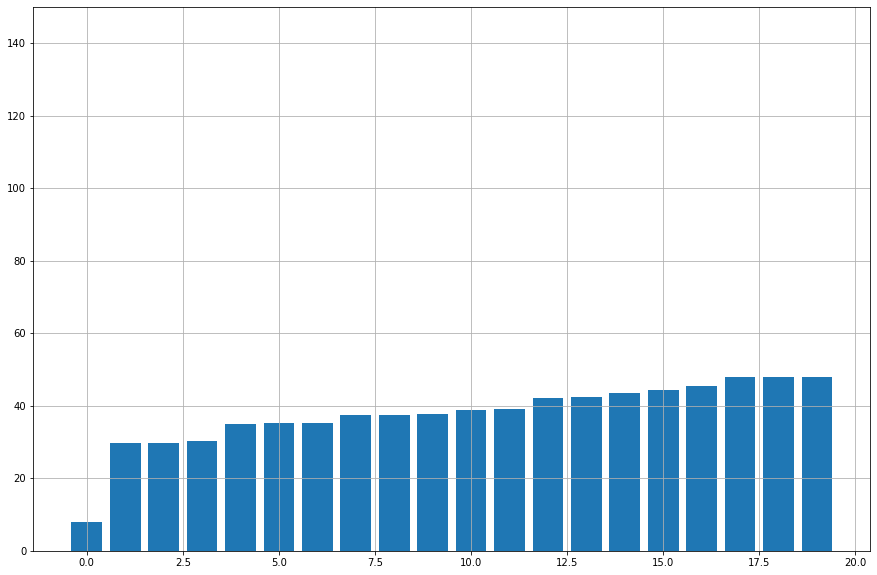

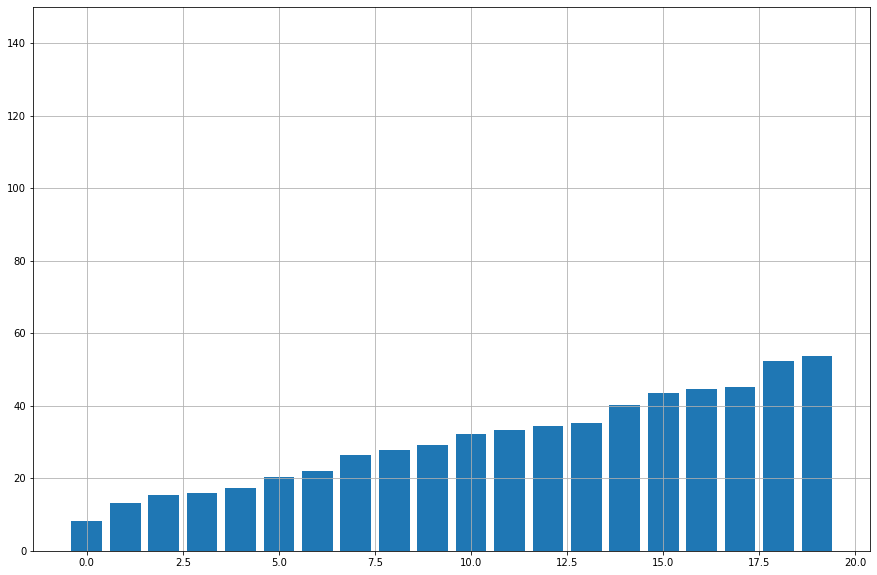

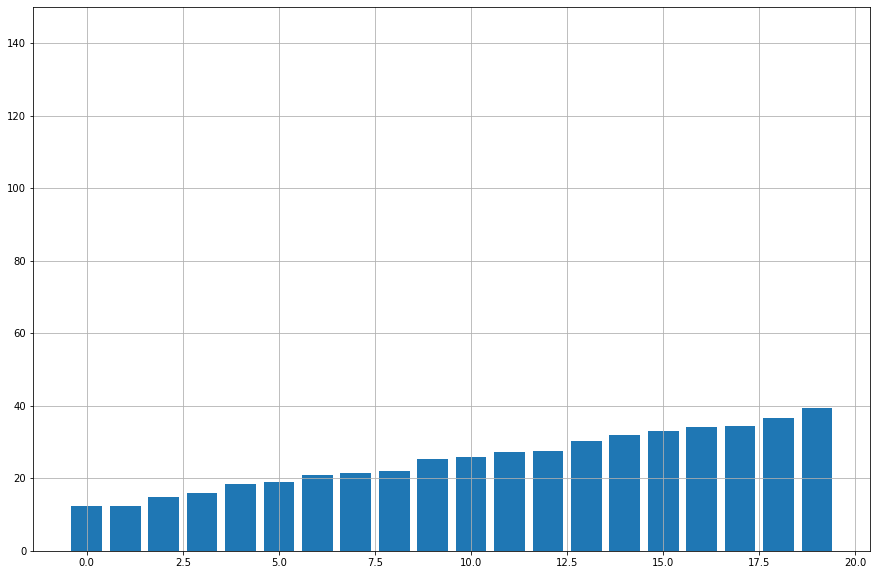

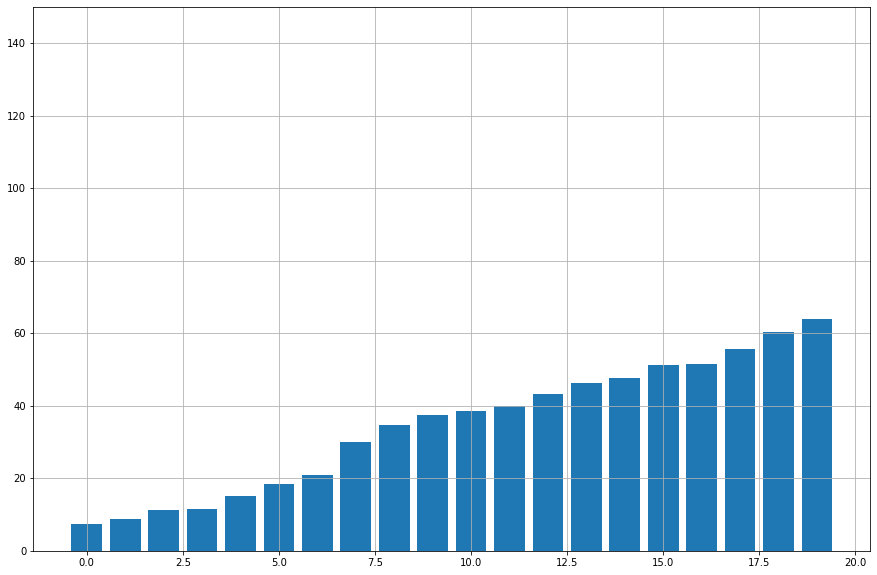

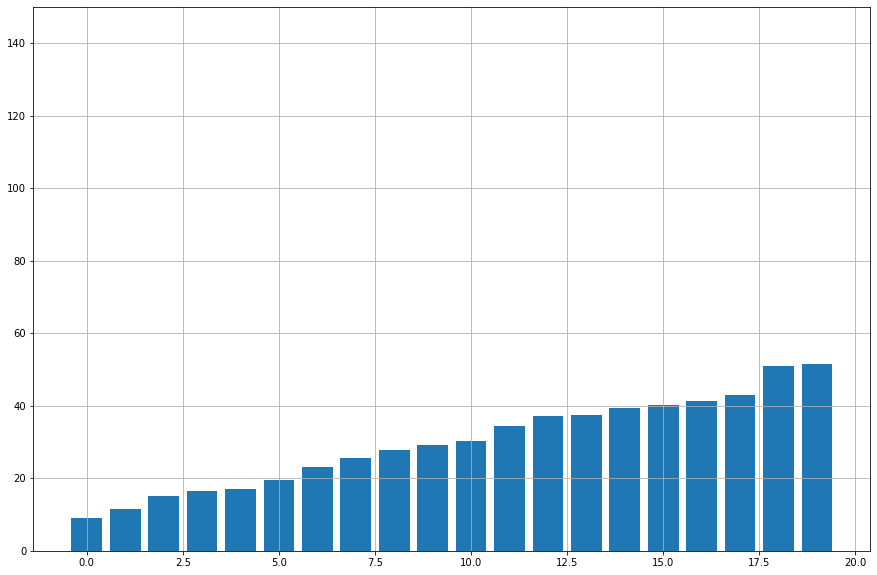

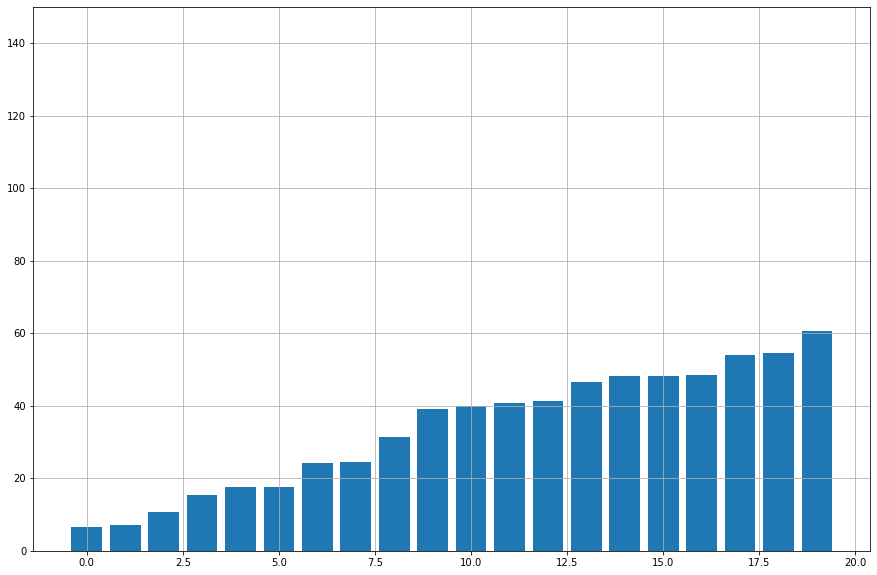

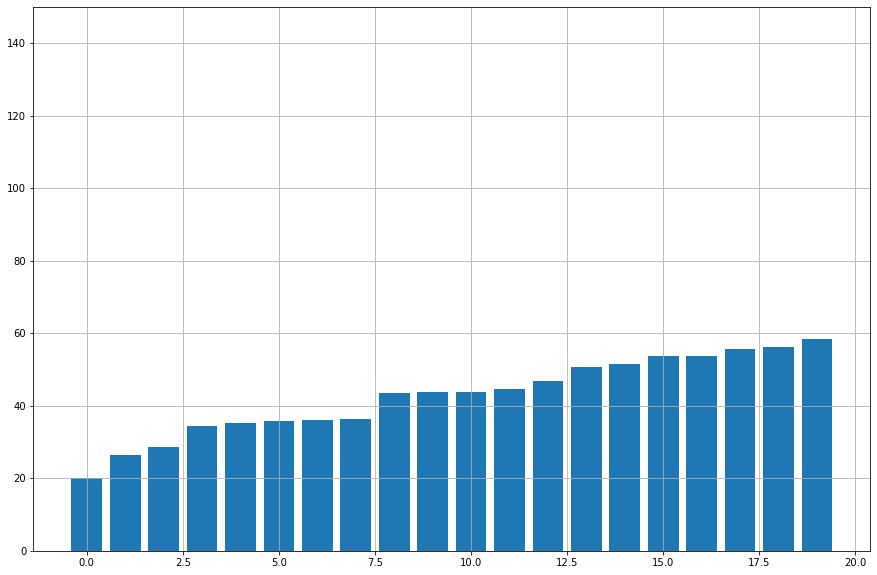

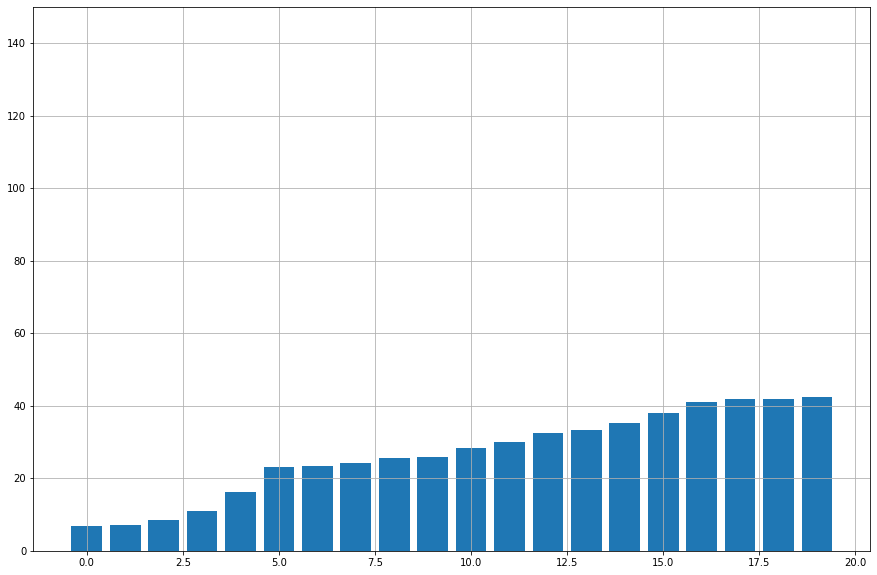

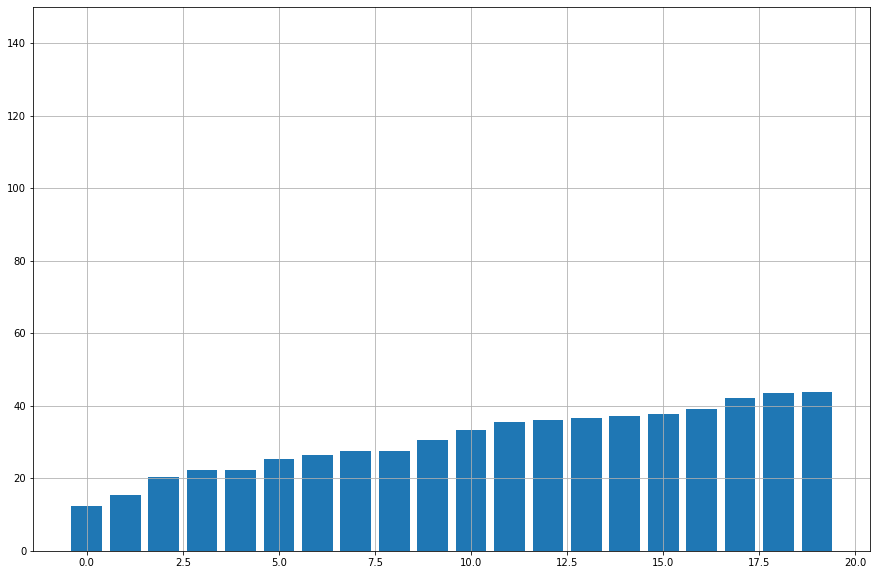

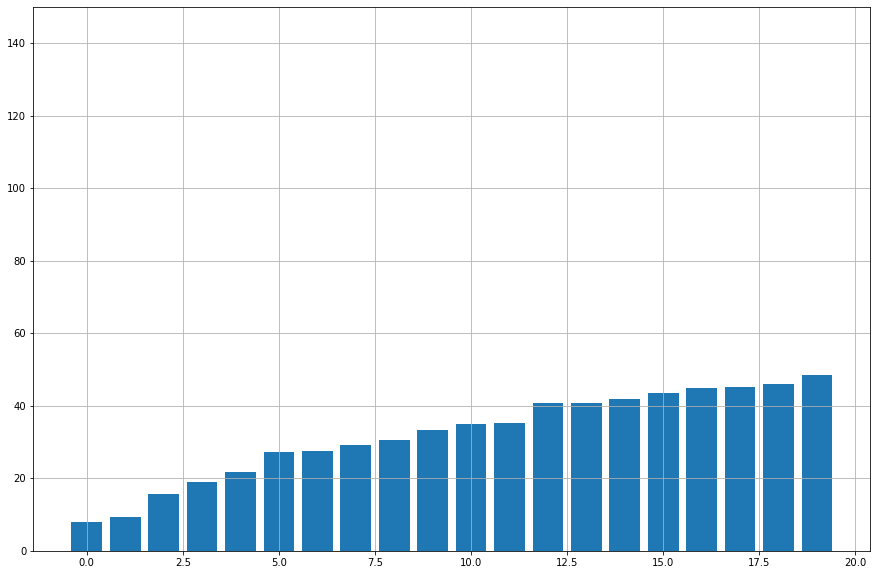

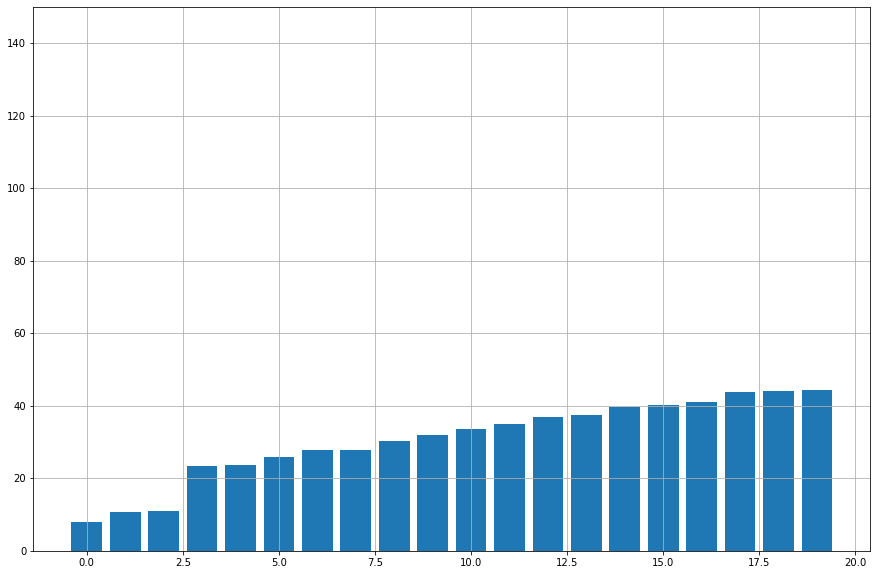

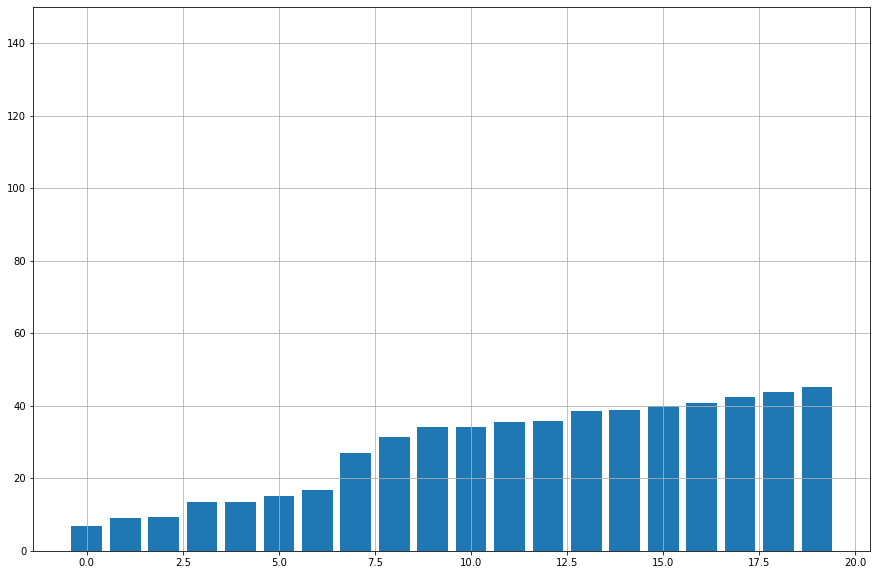

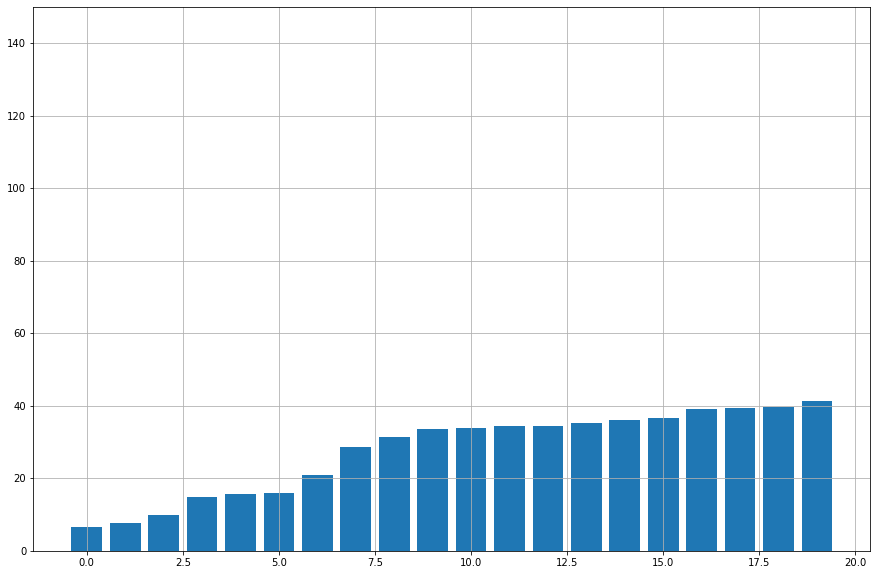

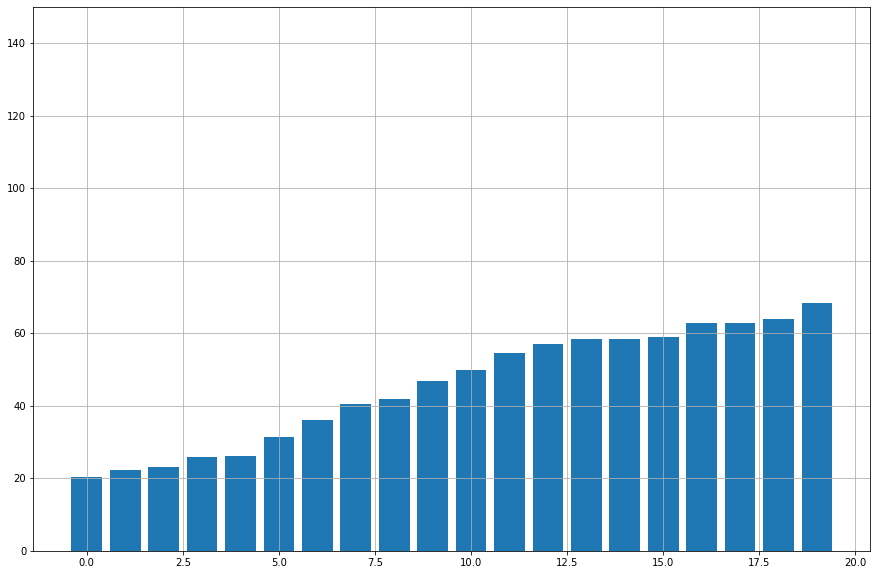

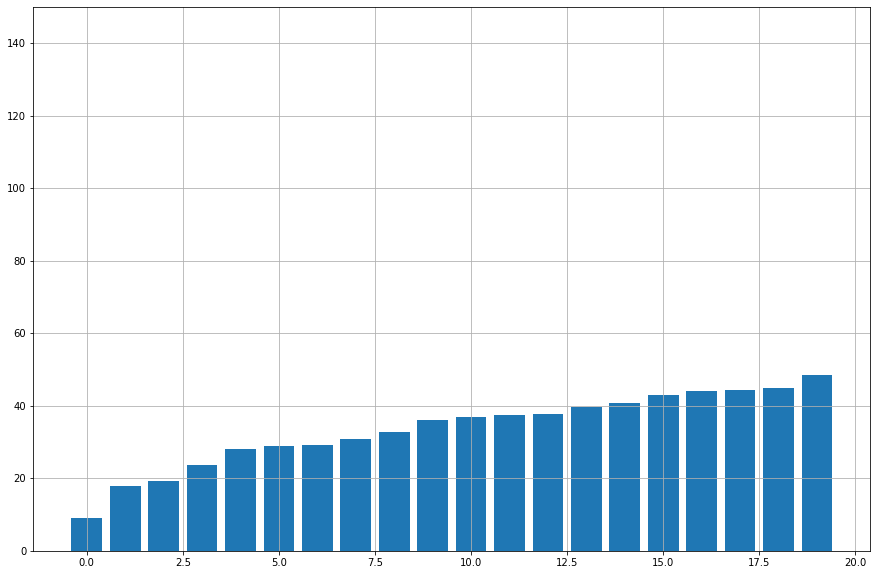

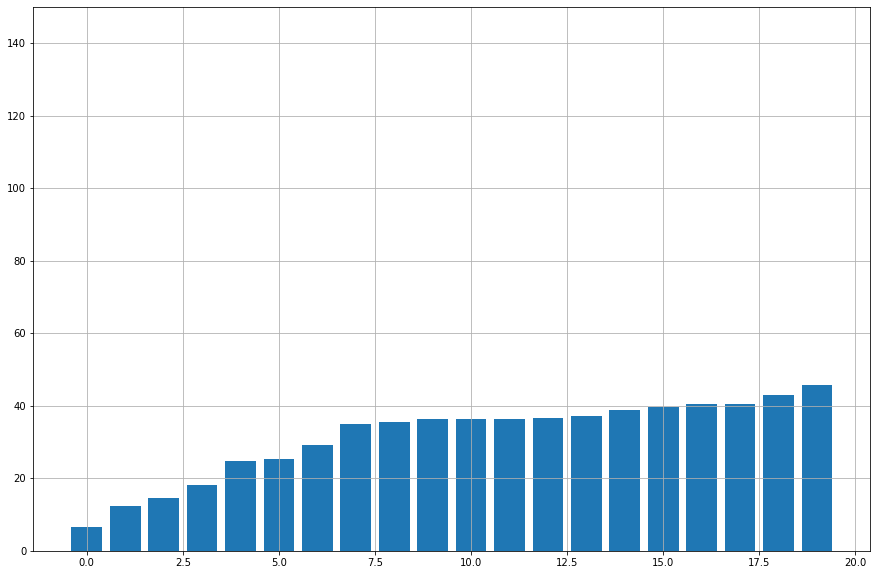

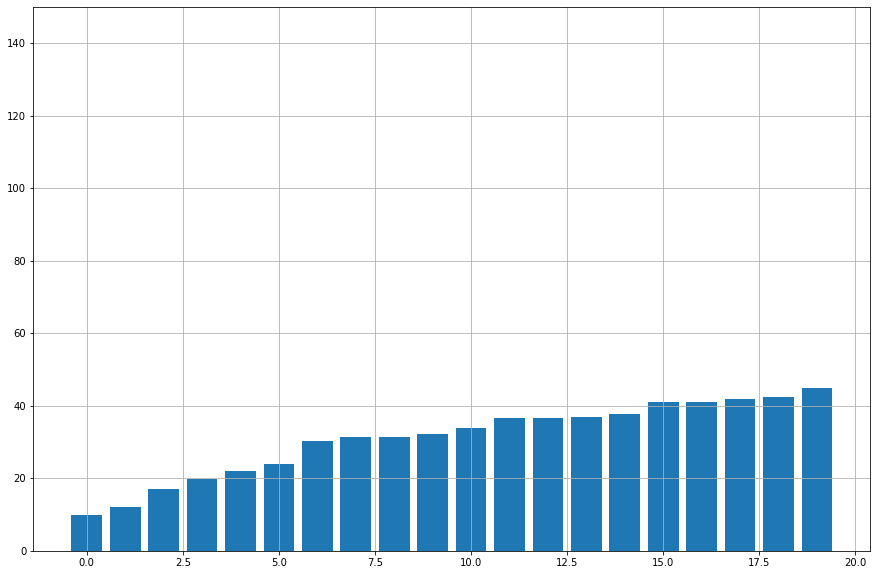

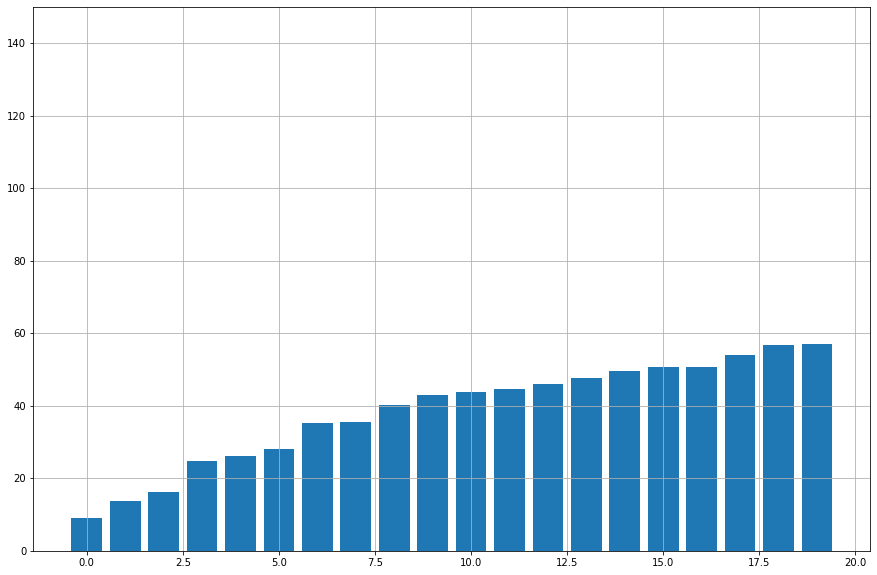

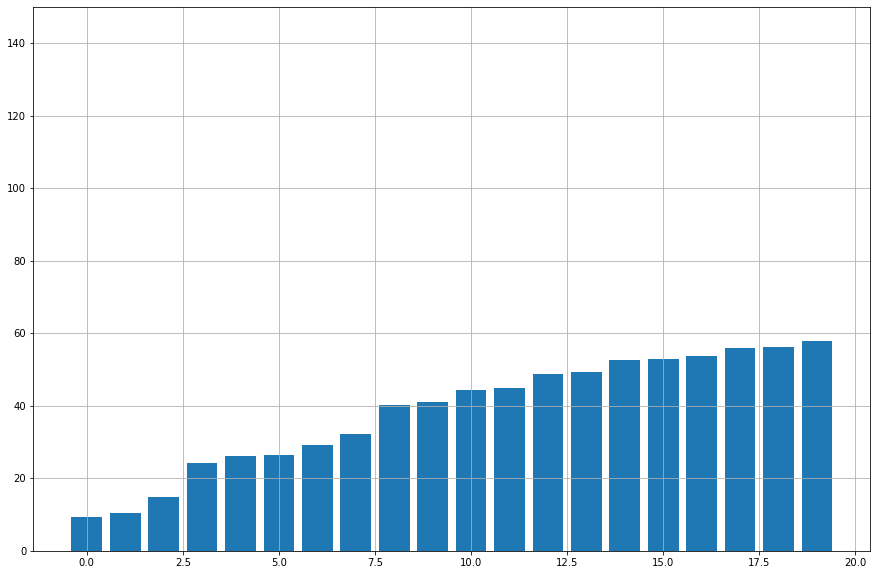

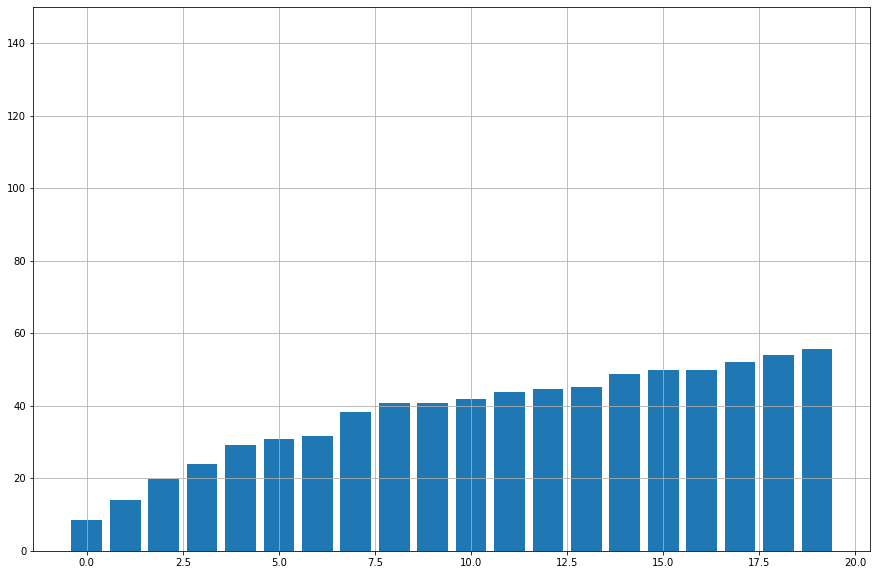

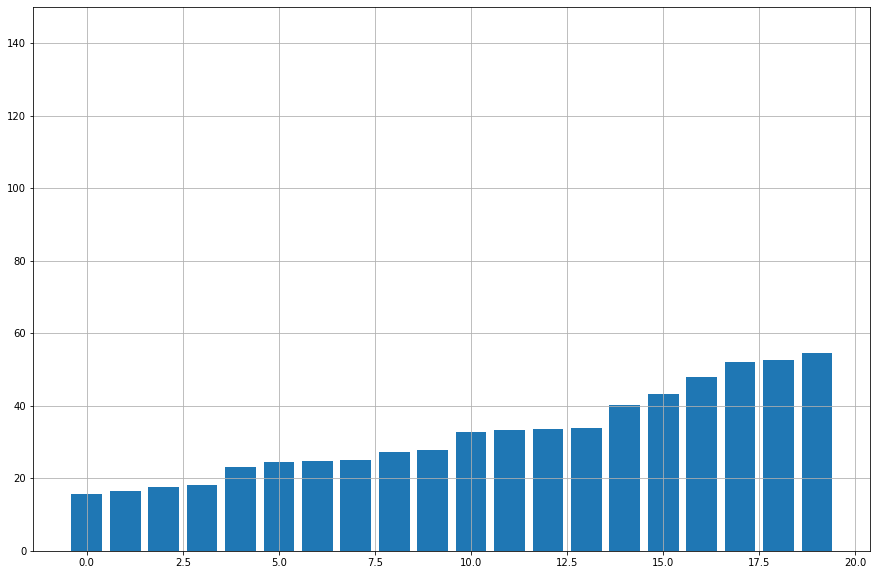

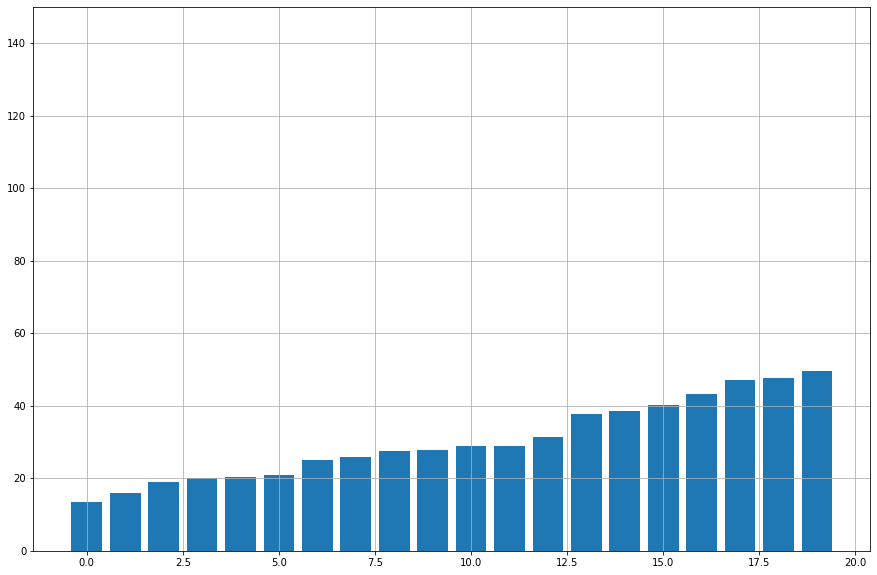

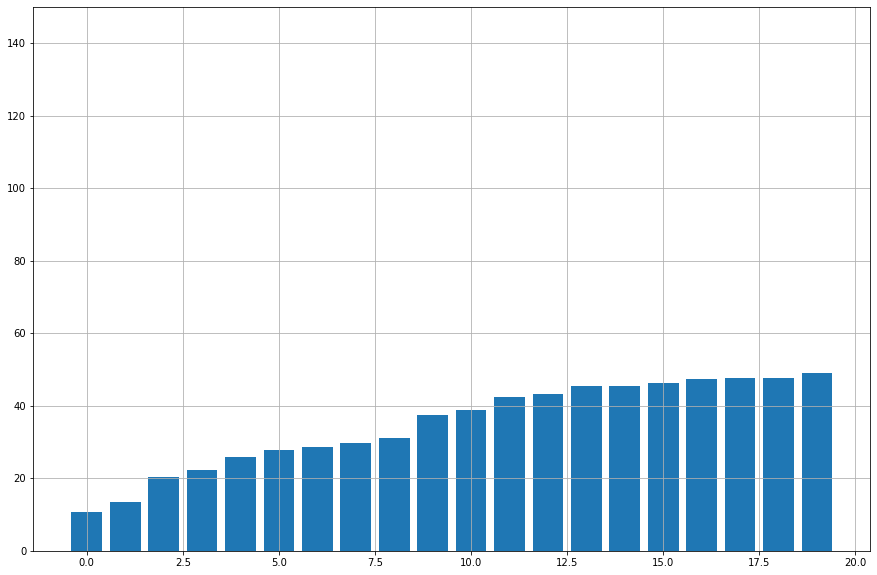

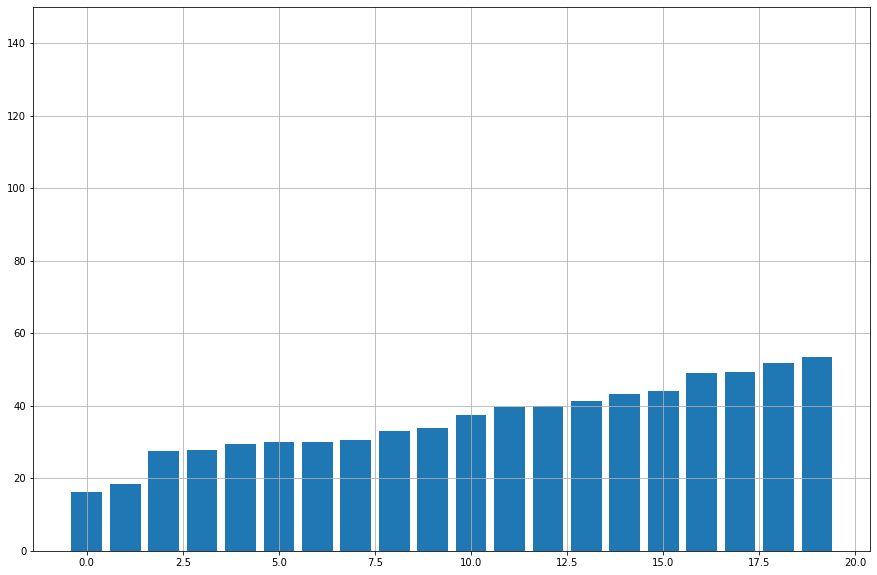

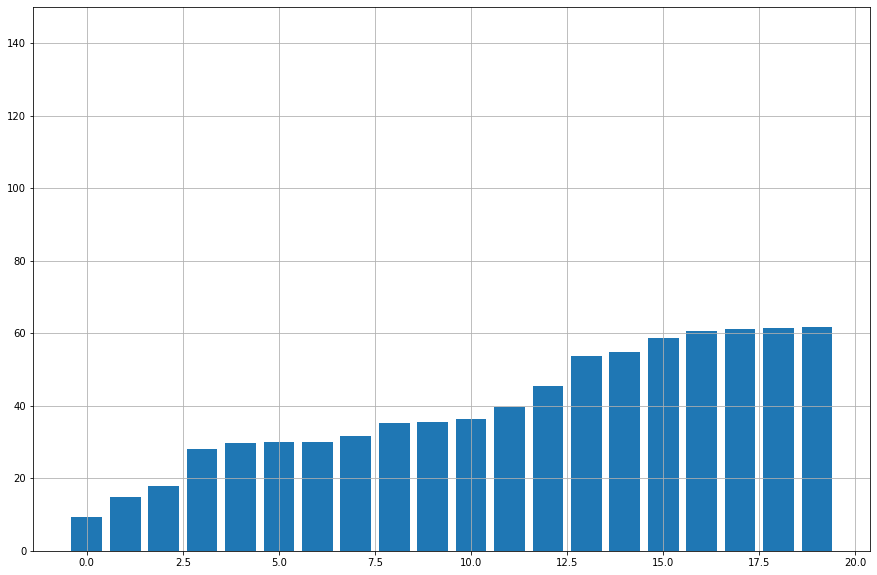

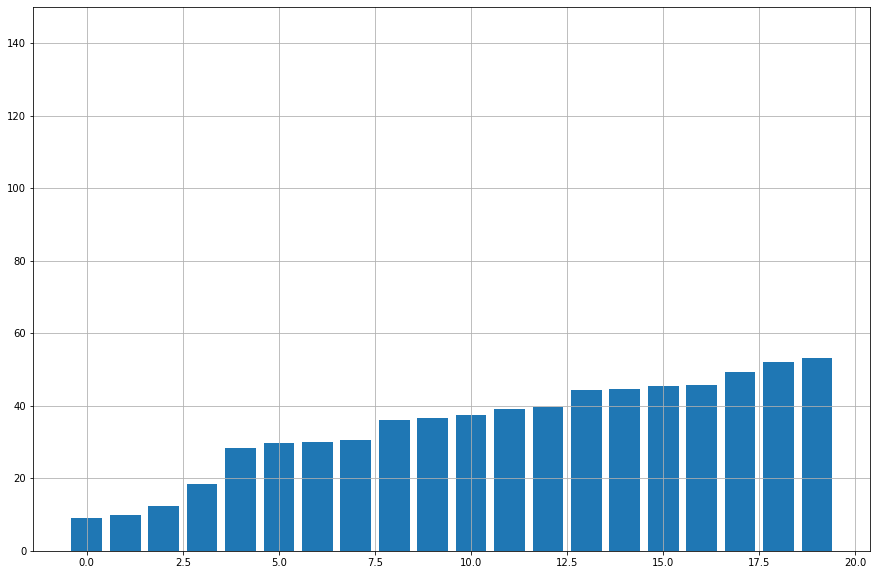

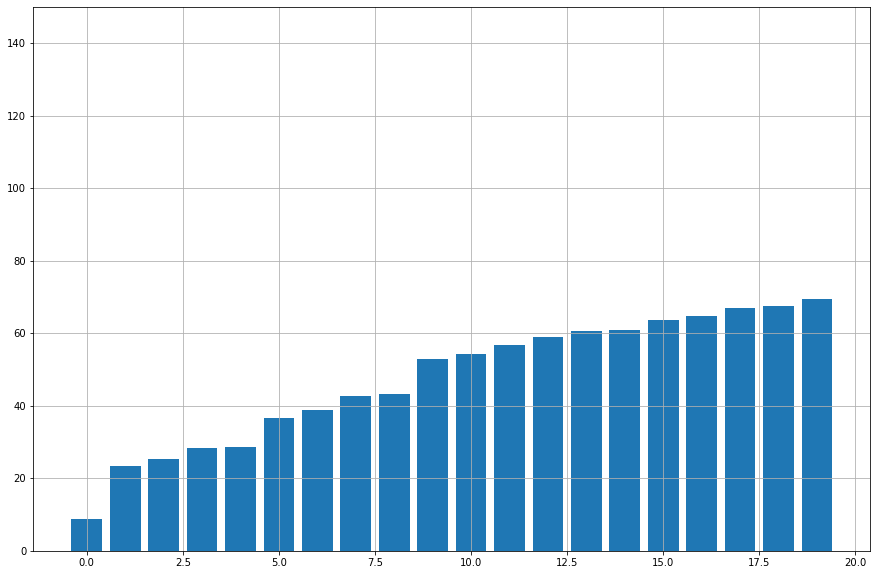

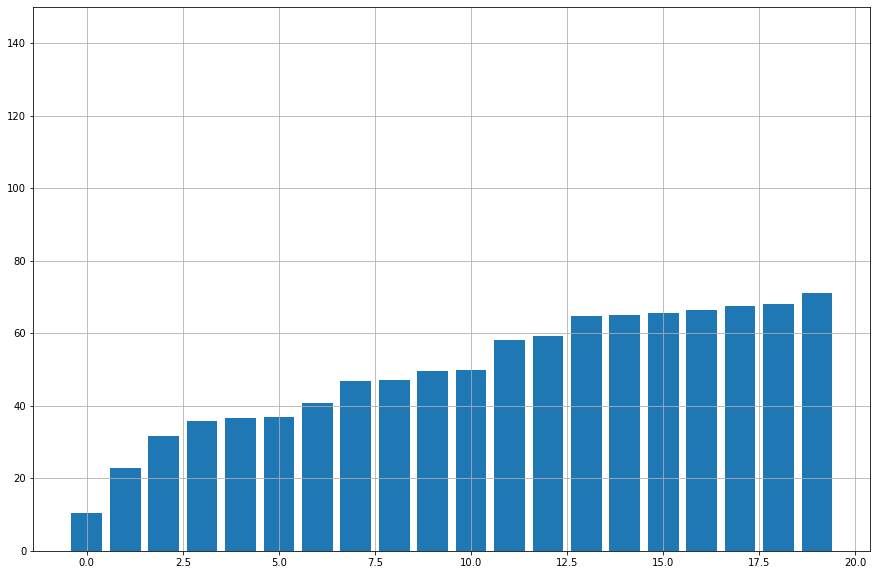

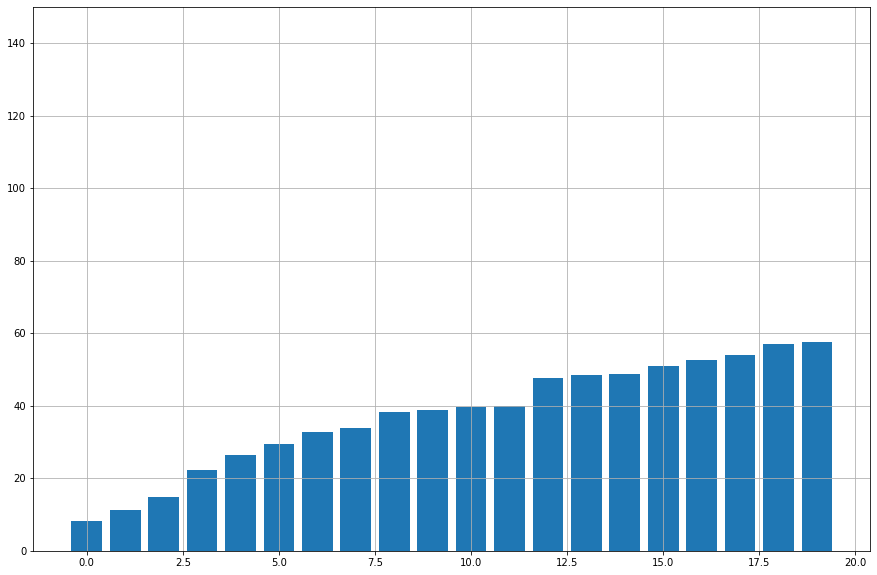

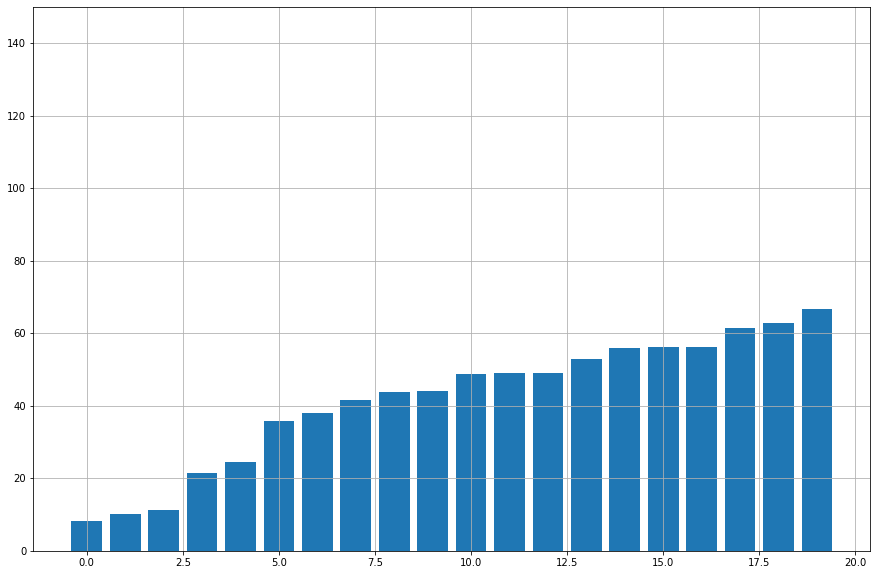

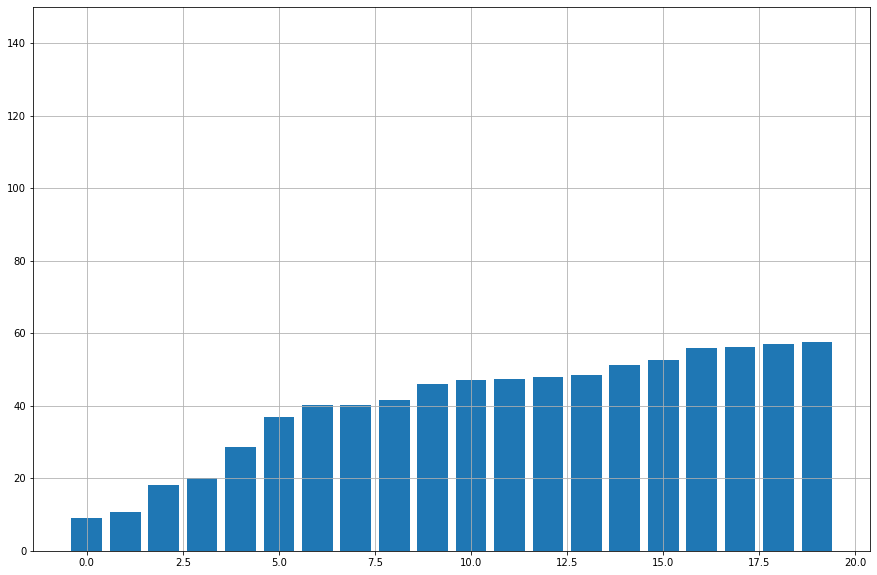

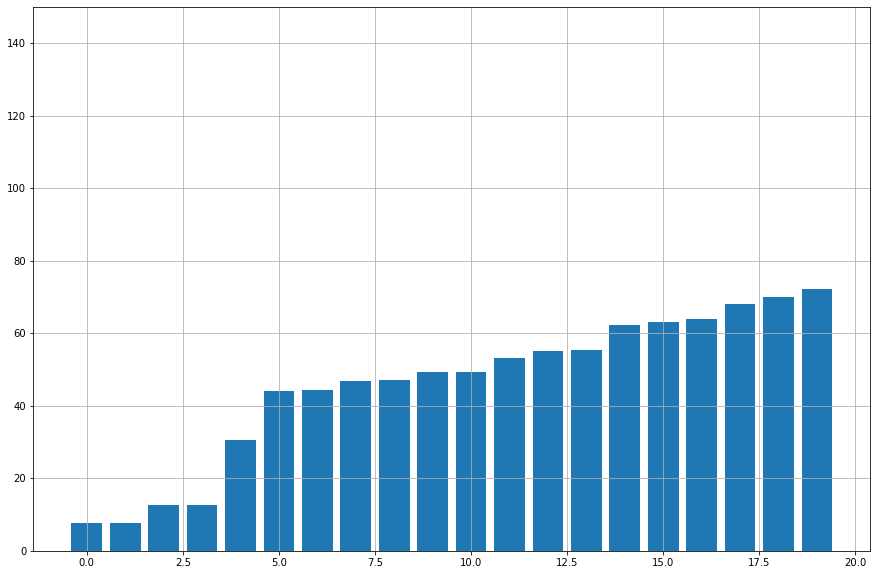

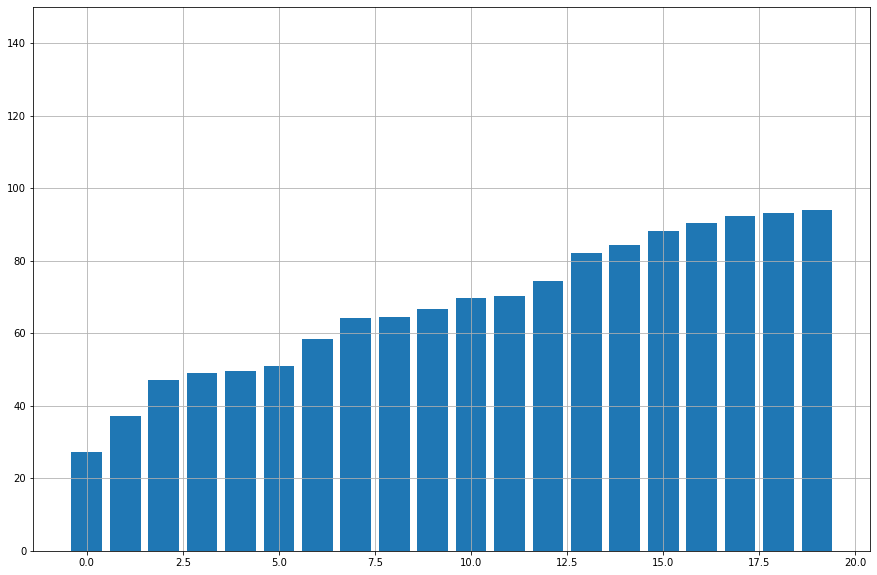

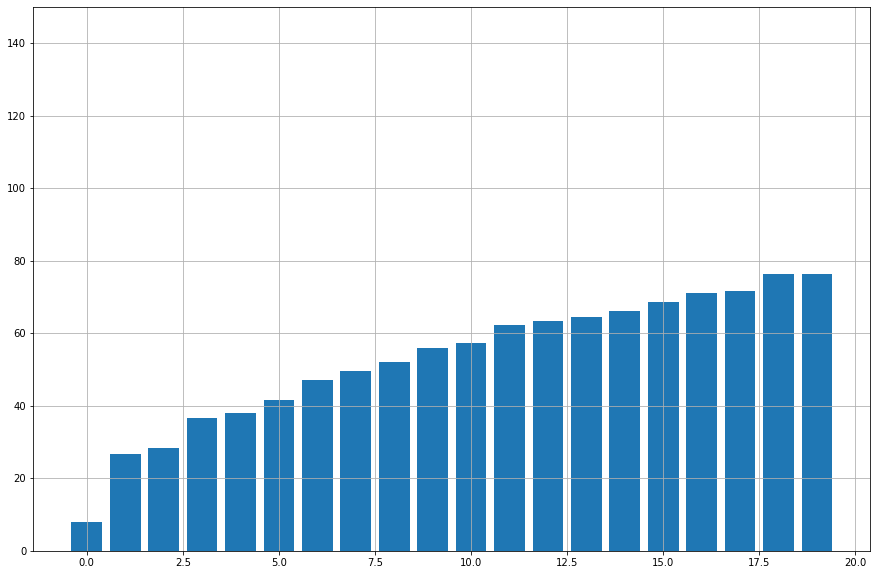

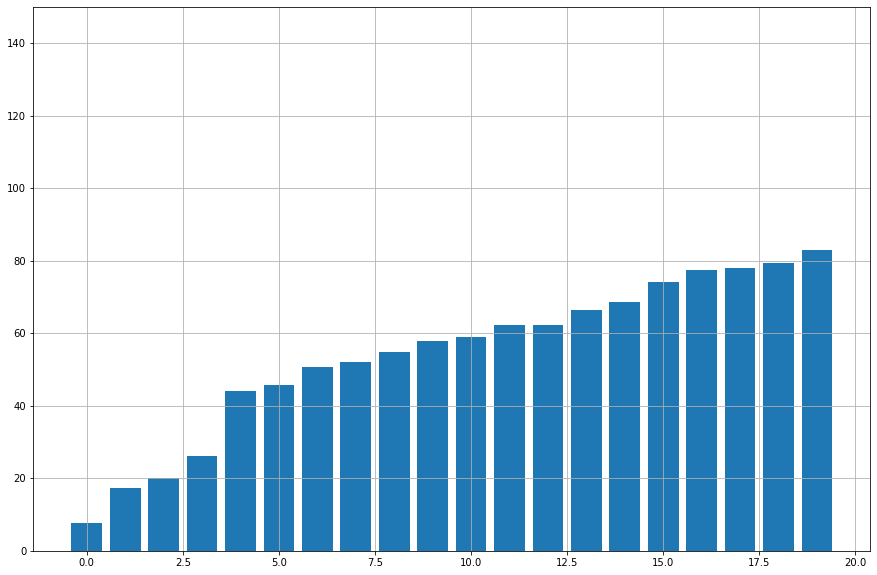

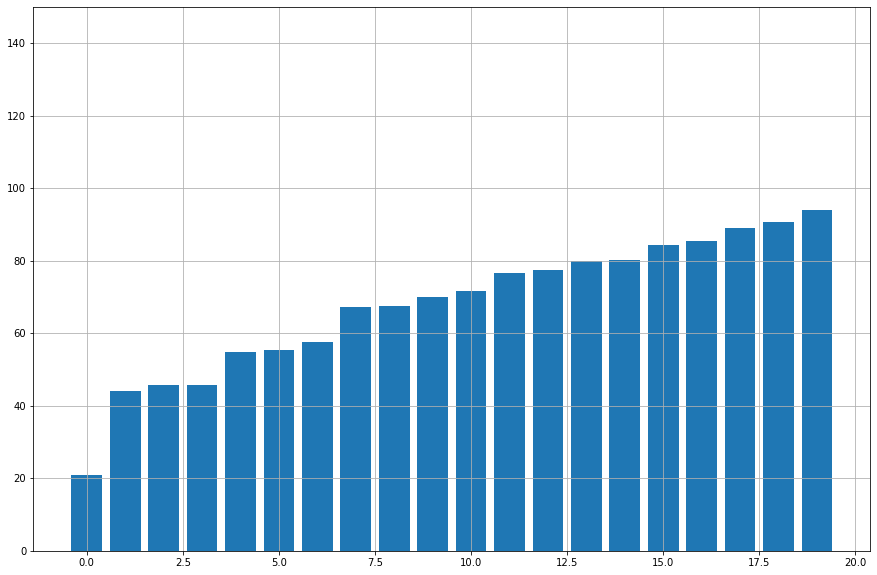

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt

for n in range(0,57):
    plt.figure(figsize=(15,10))
    plt.ylim([0,150]) 
    #plt.xlim([0,150])
    plt.bar([m for m in range(0,20)],[soted_o_distance[n][m][1] for m in range(0,20)])
    plt.grid(True)
    plt.show()

In [243]:
print("遠い側からとる")
for n in range(0,57):
    print(n+1,soted_o_distance[n][-1],soted_o_distance[n][-2],soted_o_distance[n][-3],soted_o_distance[n][-4])
    i+=1

遠い側からとる
1 (19, 90.357062325842) (58, 89.3354566919306) (22, 84.81463426828886) (20, 83.64241310498953)
2 (58, 101.02163739776569) (44, 93.36744436593104) (53, 92.16602275255167) (45, 86.97854037483518)
3 (58, 88.4908920784611) (19, 87.95820975213552) (22, 82.20098818126401) (20, 80.8412256171461)
4 (44, 182.39343518966257) (41, 170.50615251761292) (46, 167.09046509281484) (42, 161.46032788877673)
5 (58, 155.67265075865058) (53, 141.810453883837) (19, 139.13165567783898) (39, 133.98185393240982)
6 (20, 157.44966122360694) (19, 154.64089636791647) (22, 153.74303158717694) (18, 150.60900825075728)
7 (19, 134.6868594110152) (58, 133.68876125541115) (22, 127.06119465469692) (18, 126.1321118523254)
8 (20, 158.10761752231093) (19, 153.12689636789386) (22, 153.08346343779488) (18, 149.719418856304)
9 (19, 138.48929486956956) (20, 137.57498931305526) (22, 135.97331727800508) (18, 133.28969272645008)
10 (20, 148.0170479844201) (19, 143.87151781482396) (22, 143.41042078560287) (18, 140.1501276597

In [85]:
np_soted_o_distance[:,:,1]

array([[1.20703318e+01, 4.58380034e+01, 7.34895811e+01, ...,
        2.68535610e+03, 3.18434696e+03, 3.44404067e+03],
       [2.26931699e+01, 2.49583728e+01, 5.78048567e+01, ...,
        3.72084581e+03, 3.73955884e+03, 4.96716462e+03],
       [1.10951027e+01, 3.84075127e+01, 7.62822587e+01, ...,
        2.83933572e+03, 3.21350736e+03, 3.26098345e+03],
       ...,
       [2.10347973e+01, 1.05436980e+02, 1.10447805e+02, ...,
        8.75441650e+03, 9.33532711e+03, 1.08375879e+04],
       [2.14509398e+02, 2.32890499e+02, 3.23507157e+02, ...,
        1.20448710e+04, 1.30202402e+04, 1.48559147e+04],
       [2.89414472e+02, 3.50233449e+02, 4.11949099e+02, ...,
        1.26883101e+04, 1.37210441e+04, 1.57122606e+04]])

In [81]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 



0
0


TypeError: object of type 'int' has no len()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000002558FC89D90> (for post_execute):


AttributeError: 'Rectangle' object has no attribute 'do_3d_projection'

AttributeError: 'Rectangle' object has no attribute 'do_3d_projection'

<Figure size 432x288 with 1 Axes>

In [14]:
test_point = min1pipe[0]
test_zone = caiman[0]

# 処理
面積距離を出す>D(ここまでのcell)

スパイク類似度を出す>S(ここからのcell)

D×Sの最小値

[片方で検出できていない場合]はどう判断するか？

# caimanのスパイク処理

In [120]:
#caiman
#名前がアレだがmin1pipeをcaimanで計測したもの
caiman_spikes = np.load(r"C:\Users\natsu\CaImAn\demos\notebooks\min1pipe_spikes.npy")

In [395]:
print(caiman_spikes.shape)#0から60まで　shapで見ると61個出してくれる
print(len(caiman))　#0から60まで　lenで見ると60と出す

(61, 1000)
60


In [402]:
caiman_spikes[61]

IndexError: index 61 is out of bounds for axis 0 with size 61

In [121]:
caiman_spikes[0].shape

(1000,)

In [147]:
type(caiman_spikes[0])

numpy.ndarray

In [150]:
caiman_spikes[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.70632324e+01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

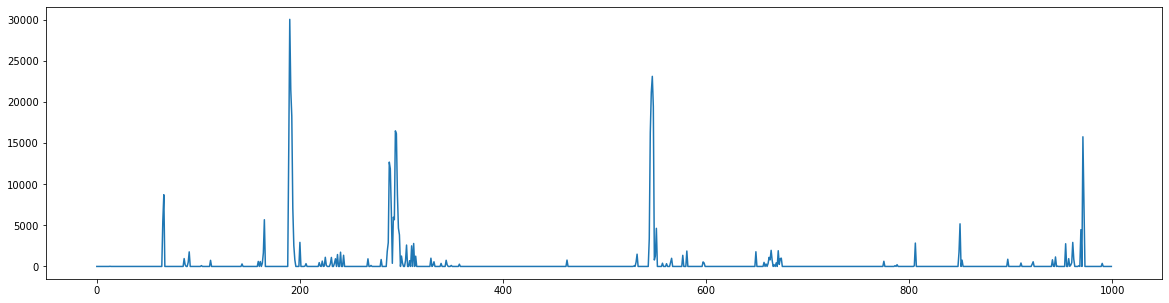

In [122]:
plt.figure(figsize=(20,5))
plt.plot(caiman_spikes[0])
plt.show()

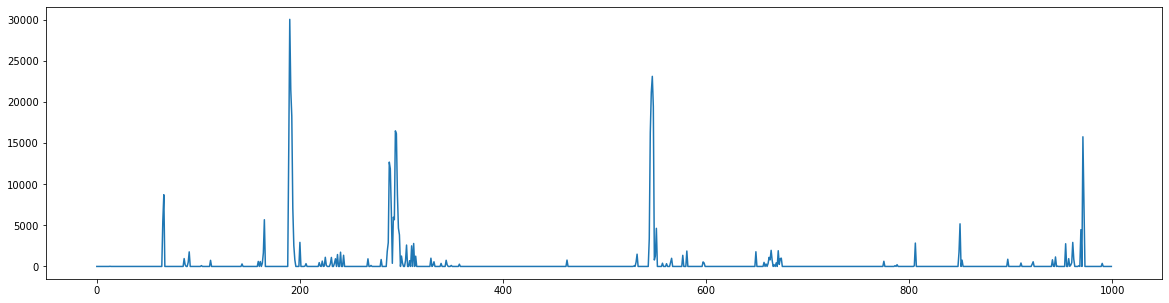

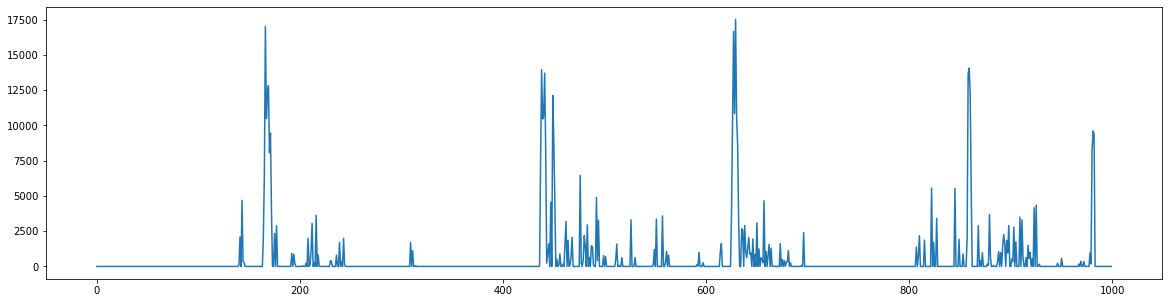

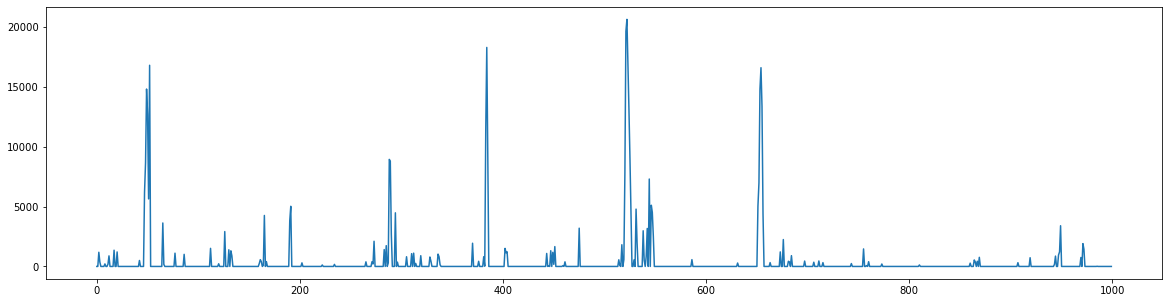

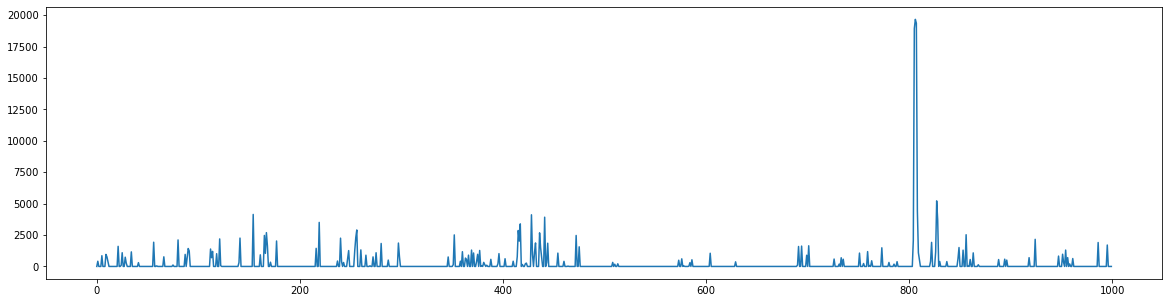

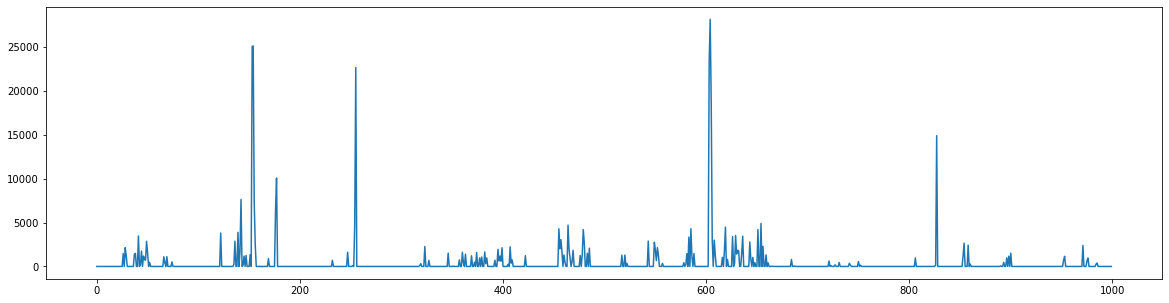

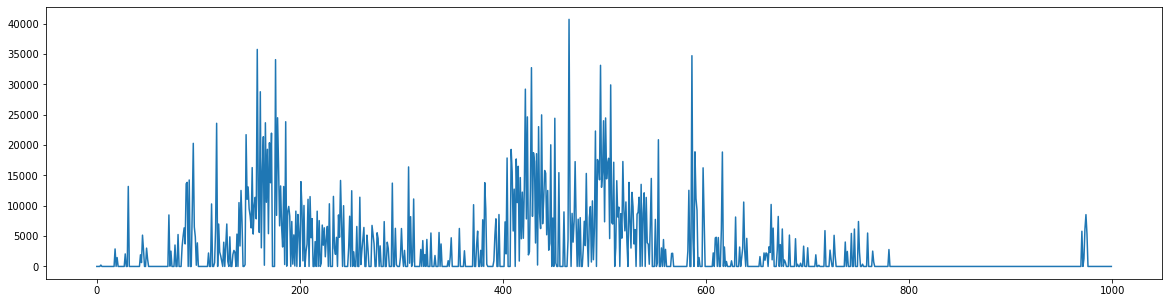

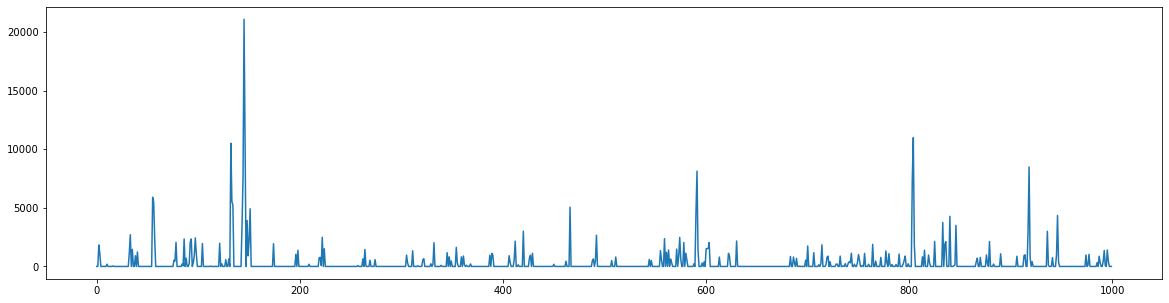

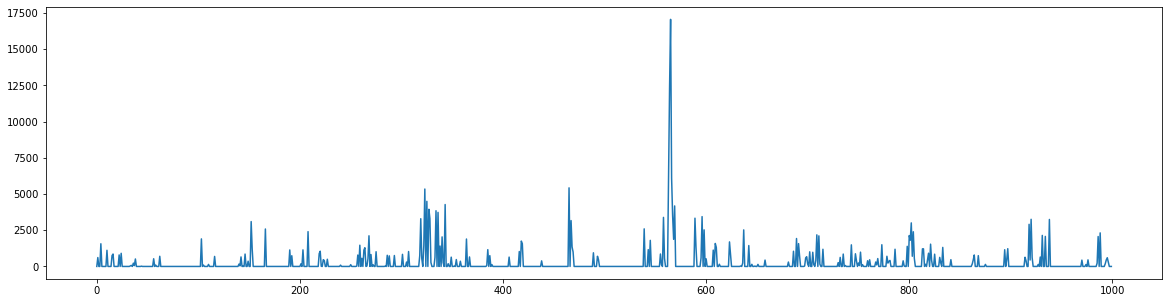

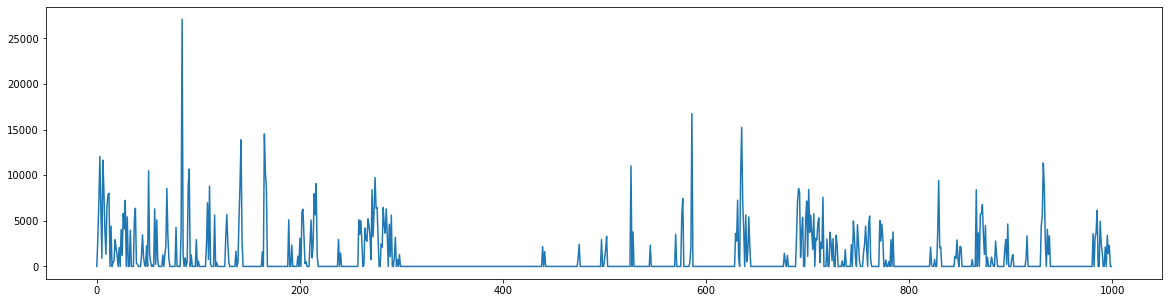

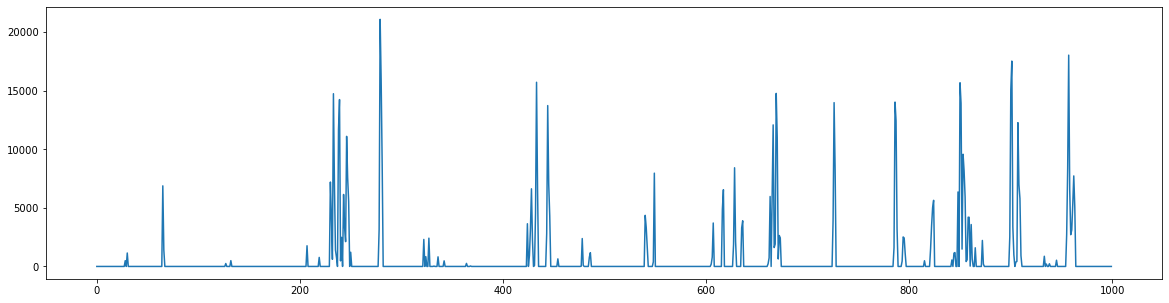

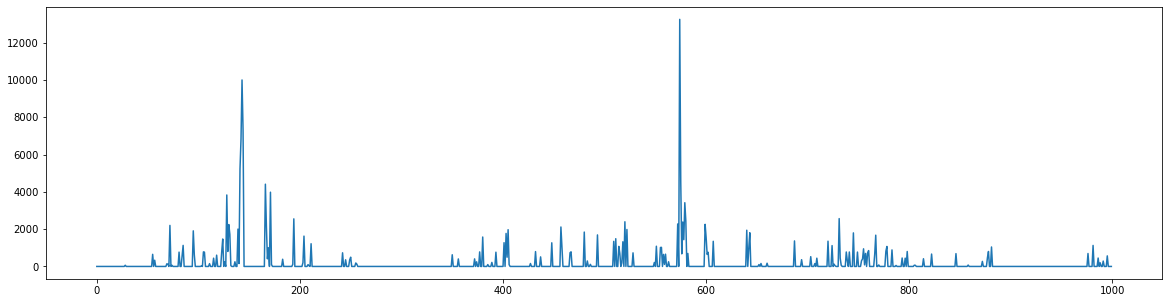

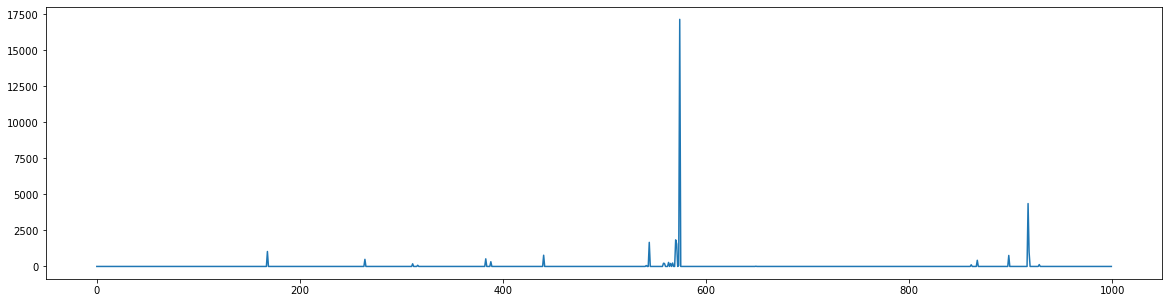

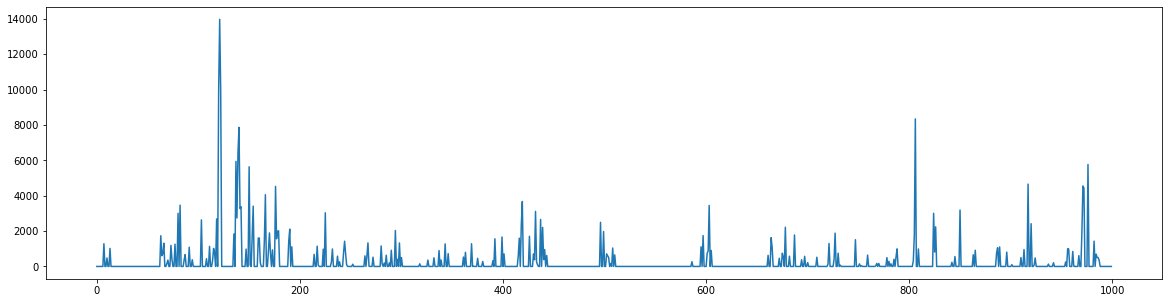

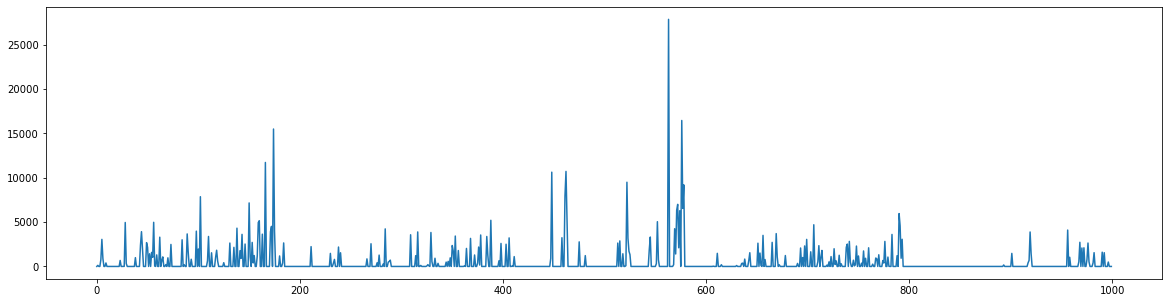

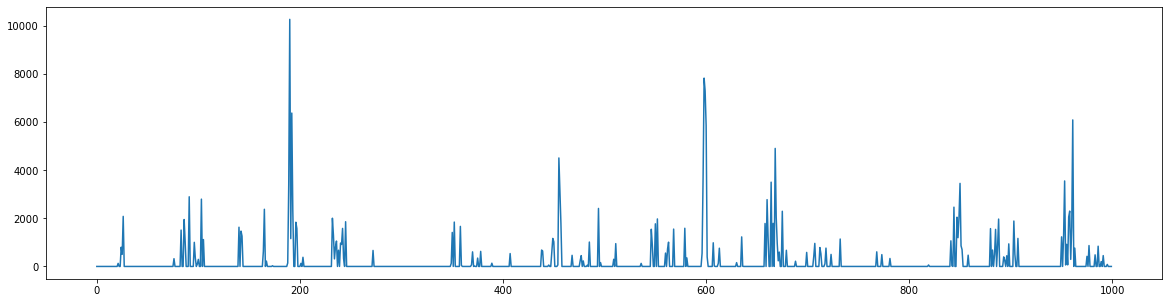

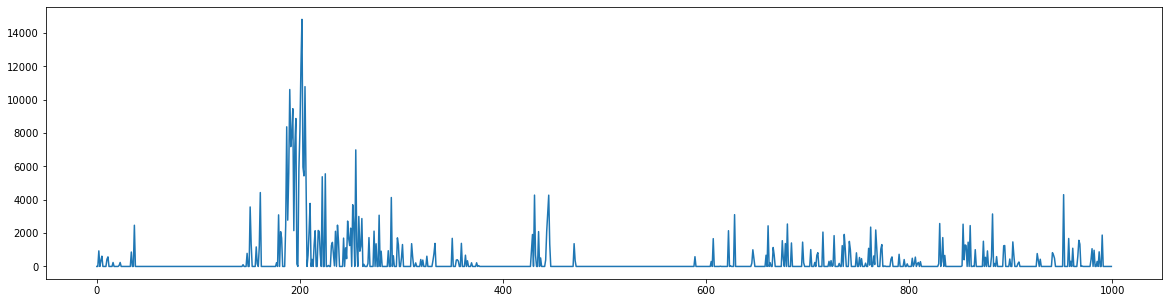

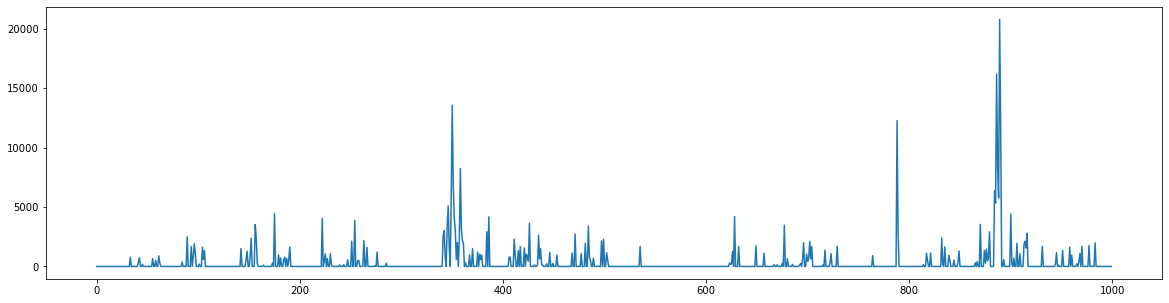

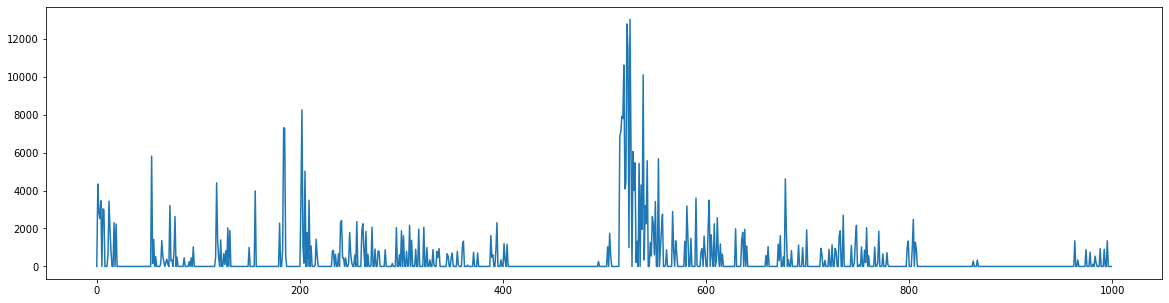

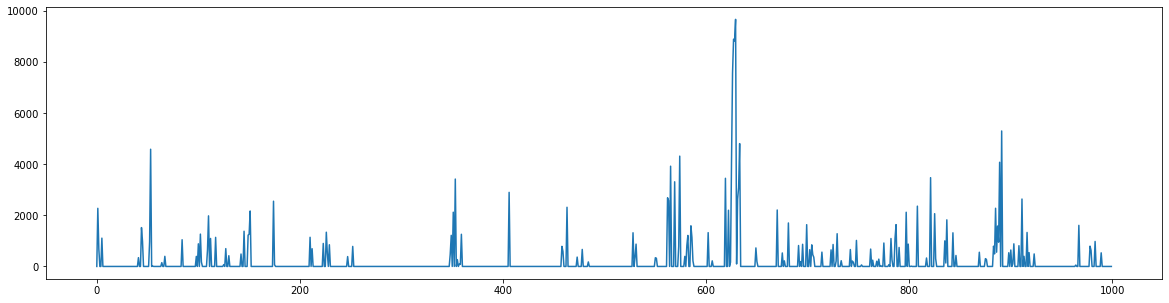

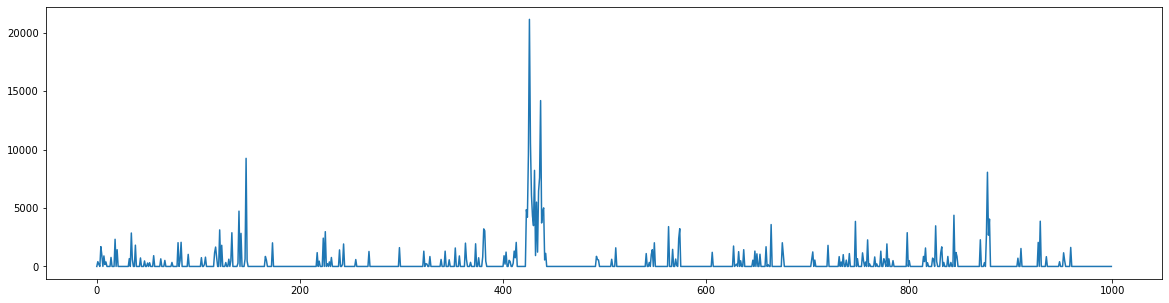

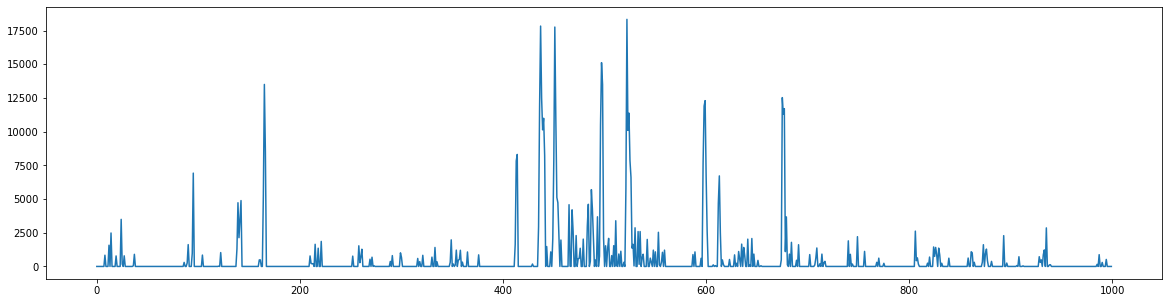

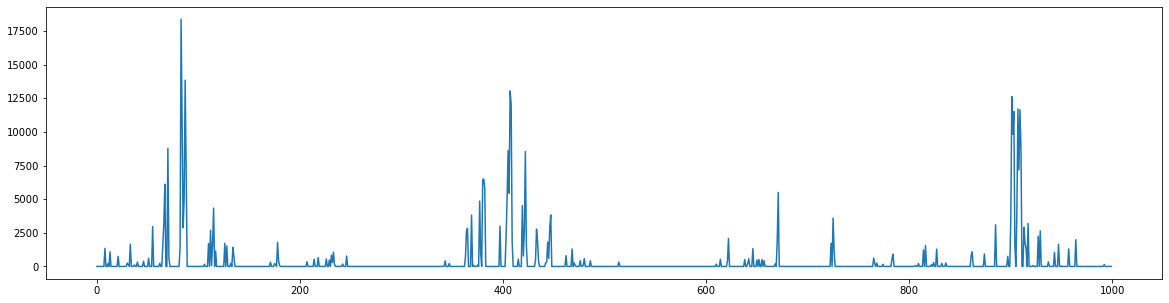

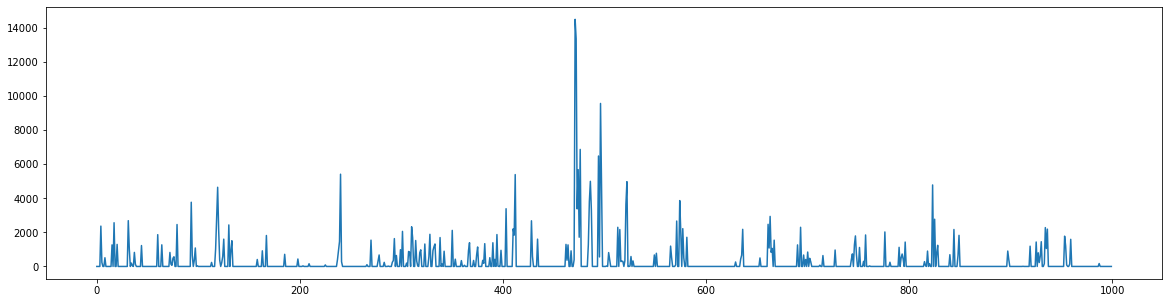

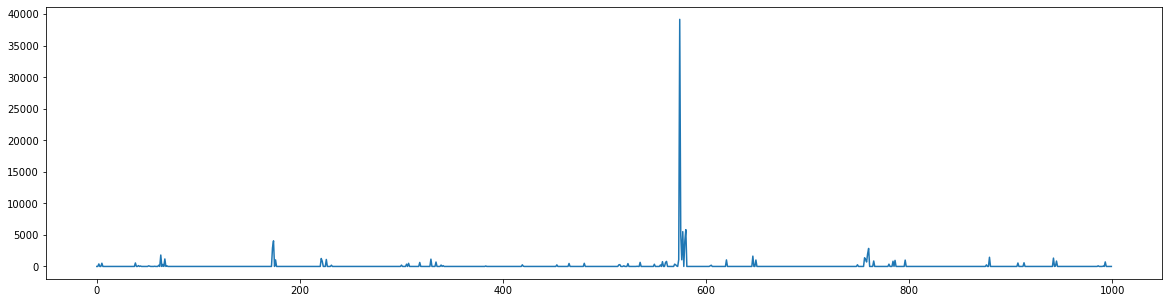

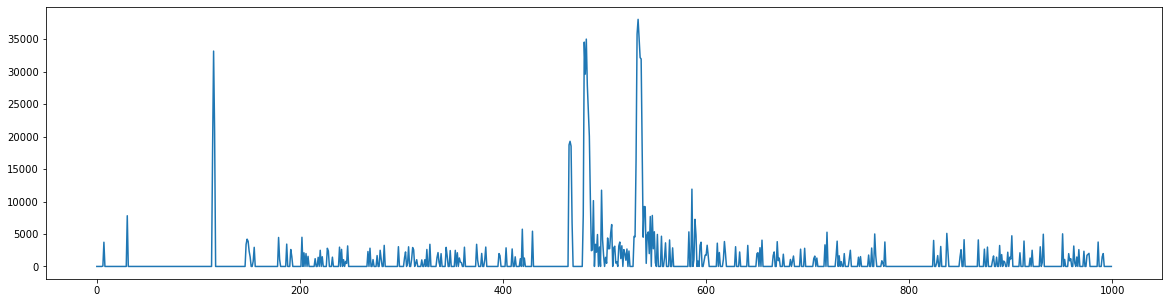

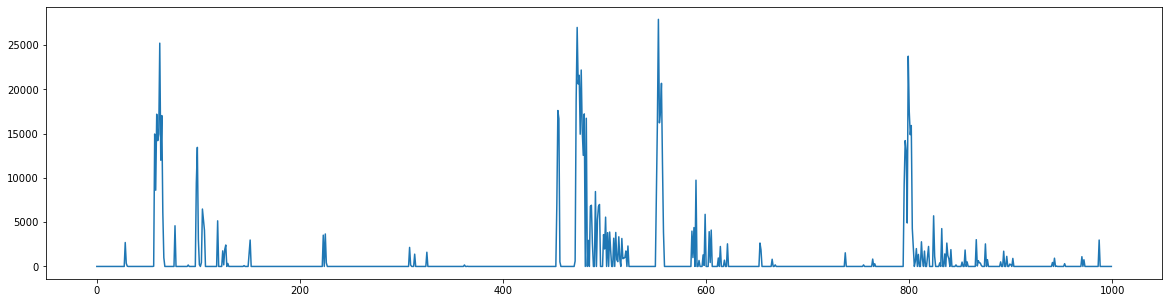

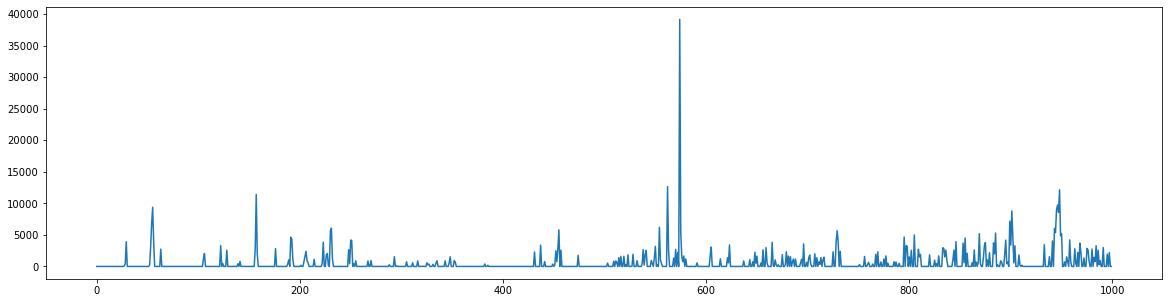

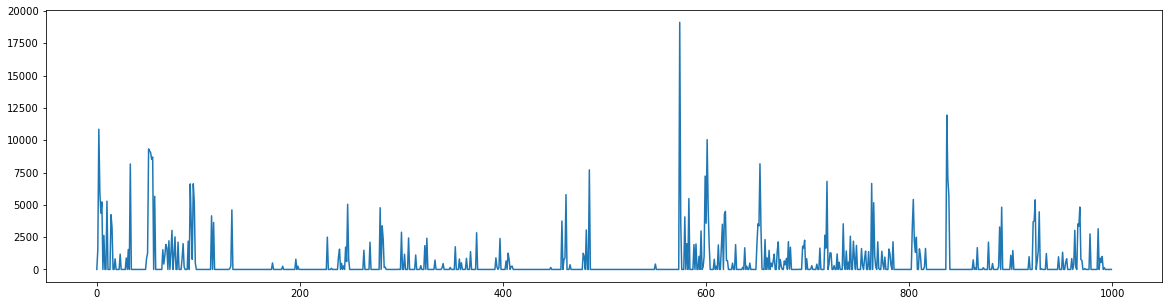

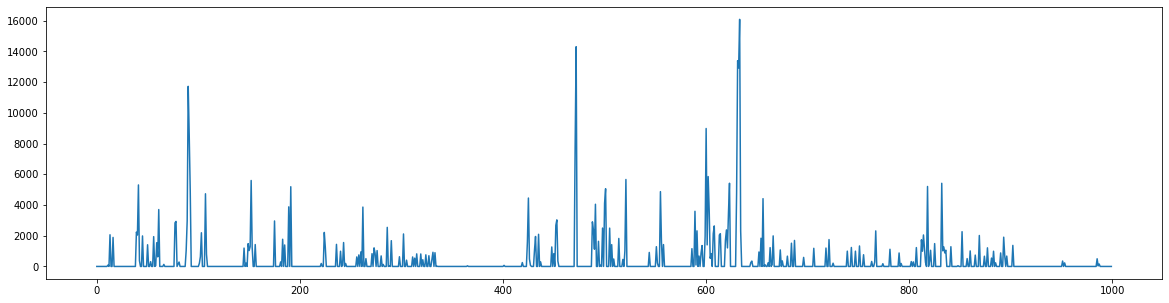

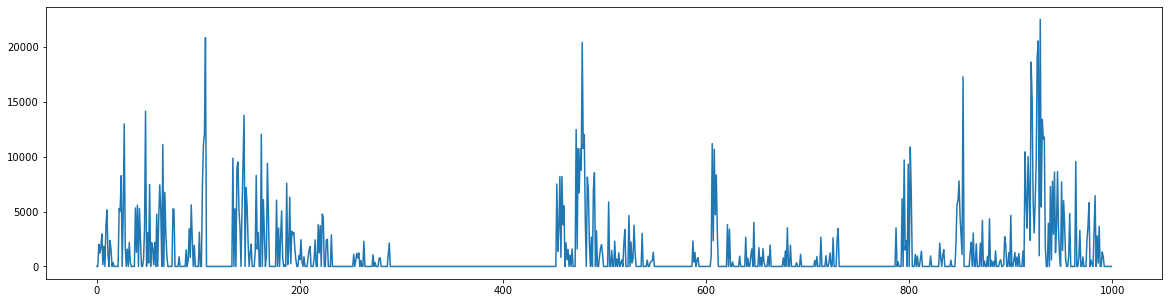

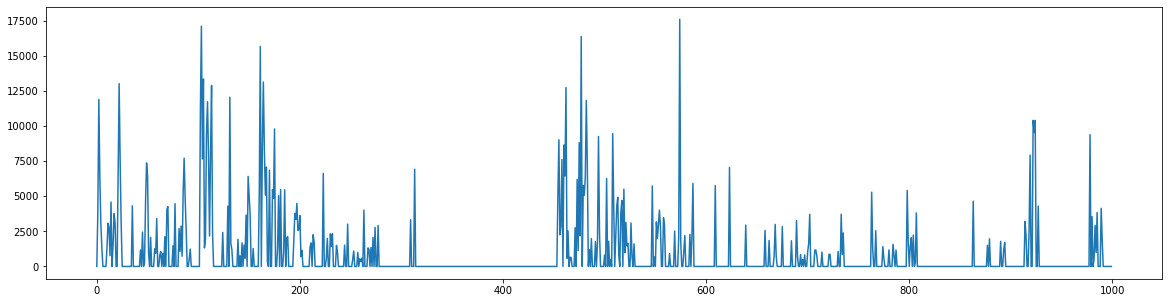

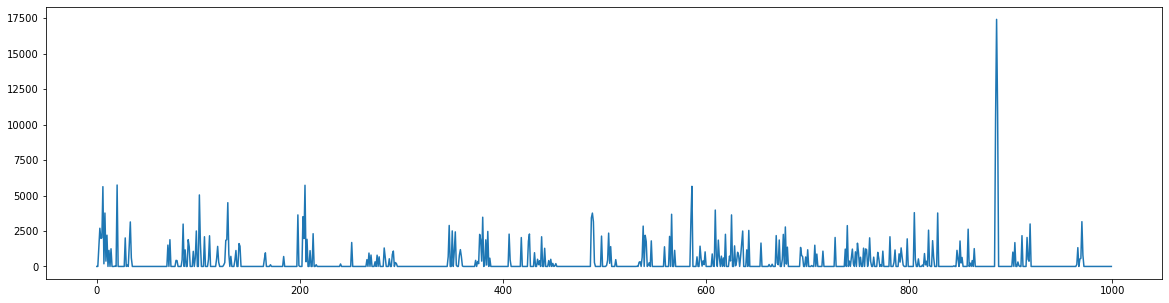

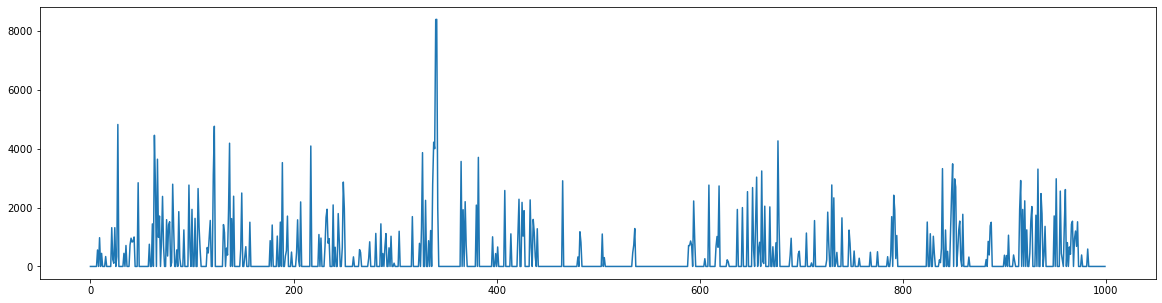

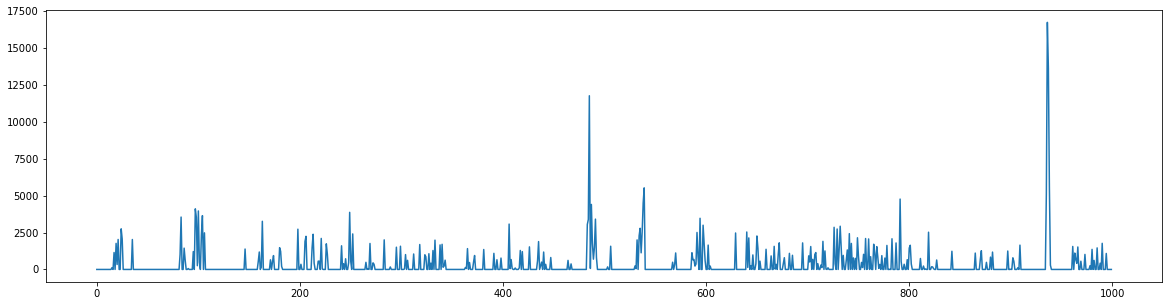

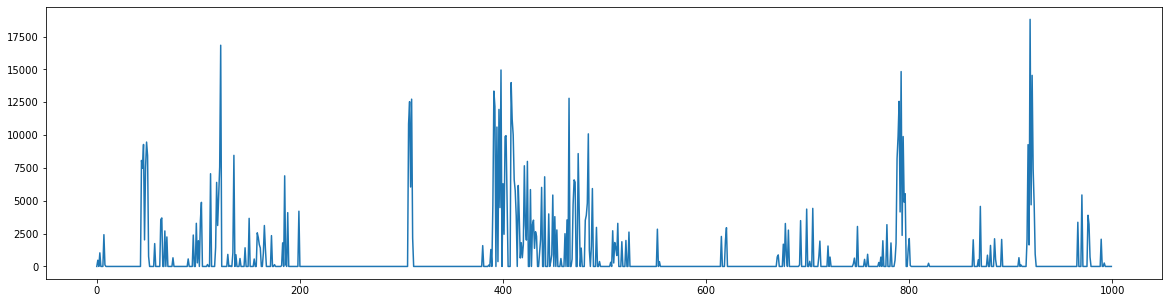

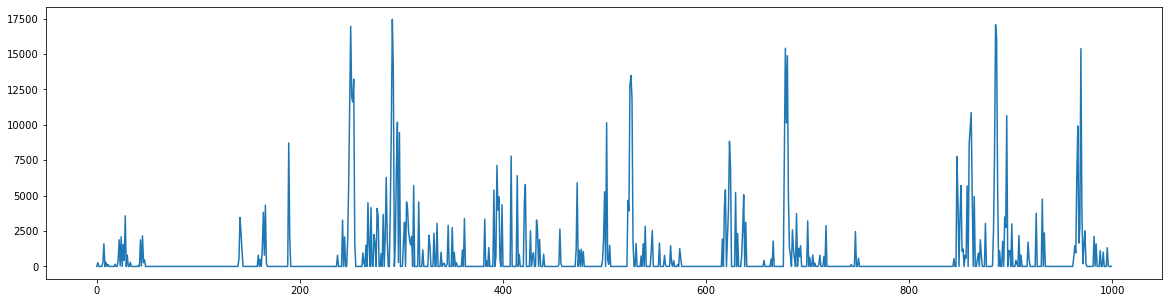

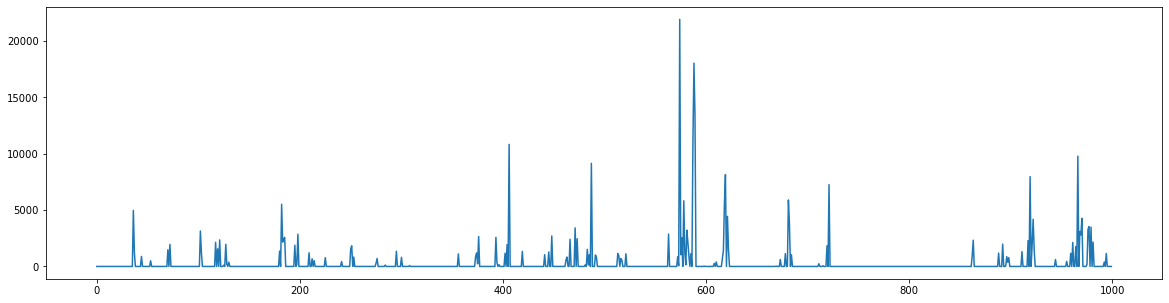

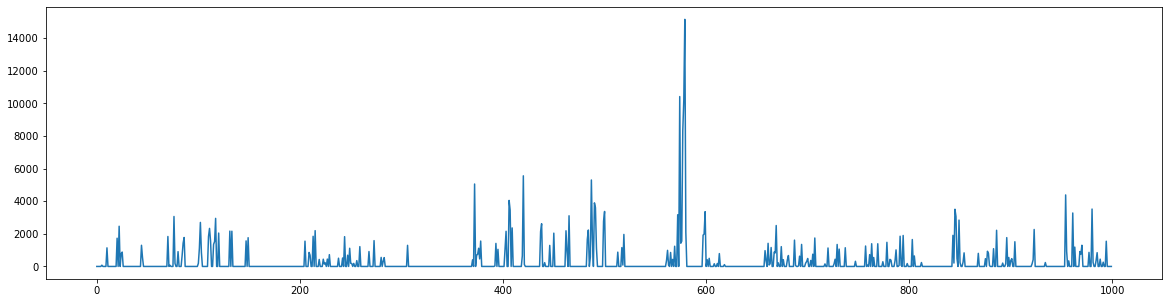

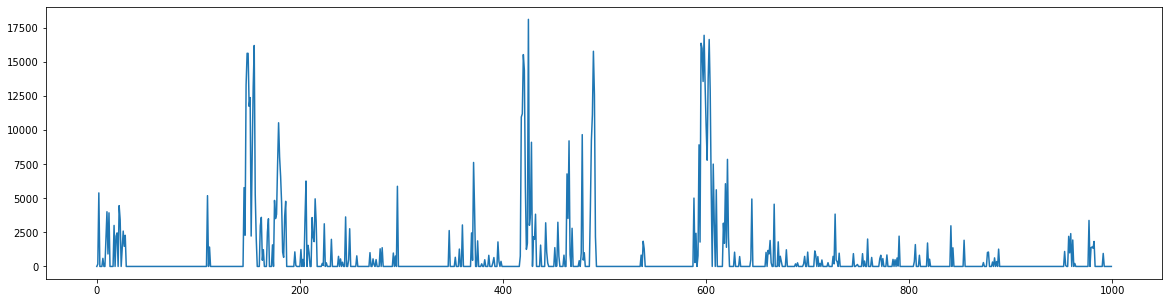

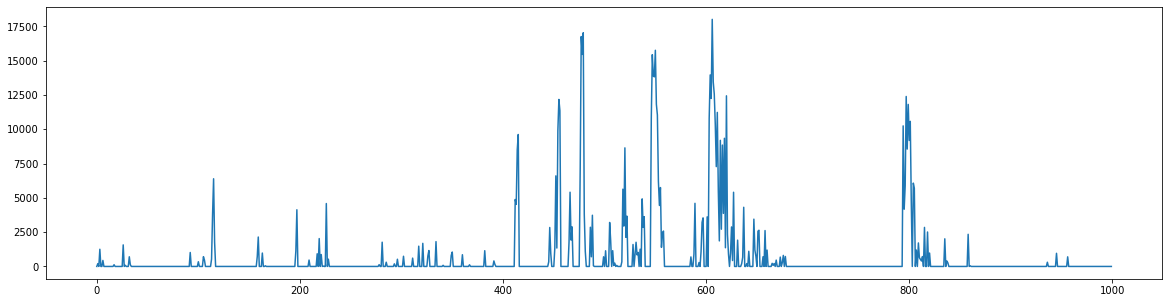

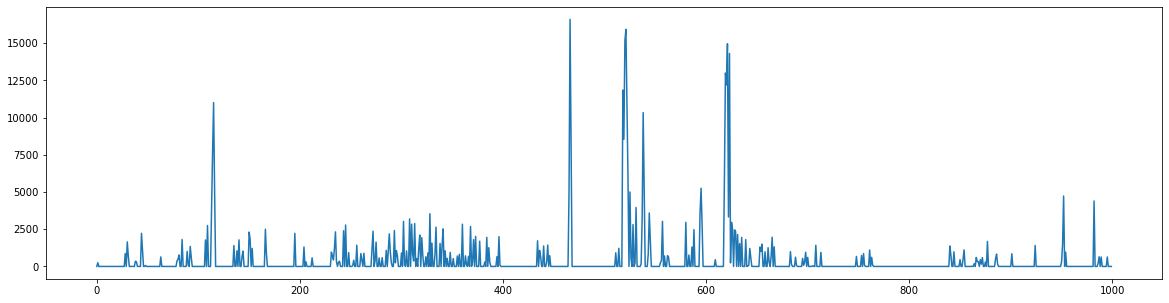

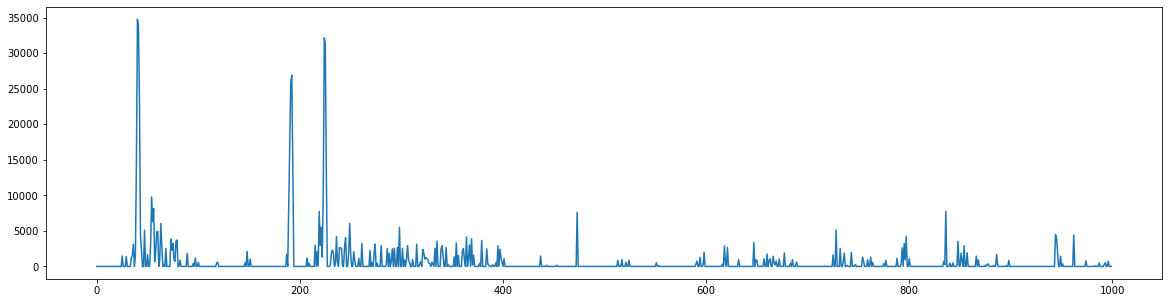

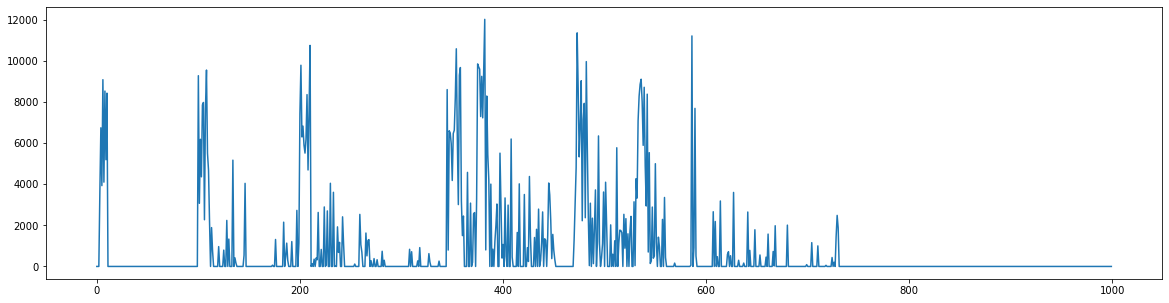

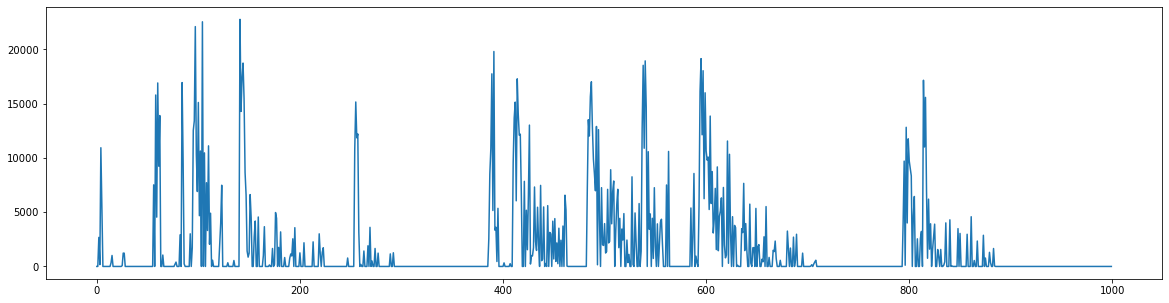

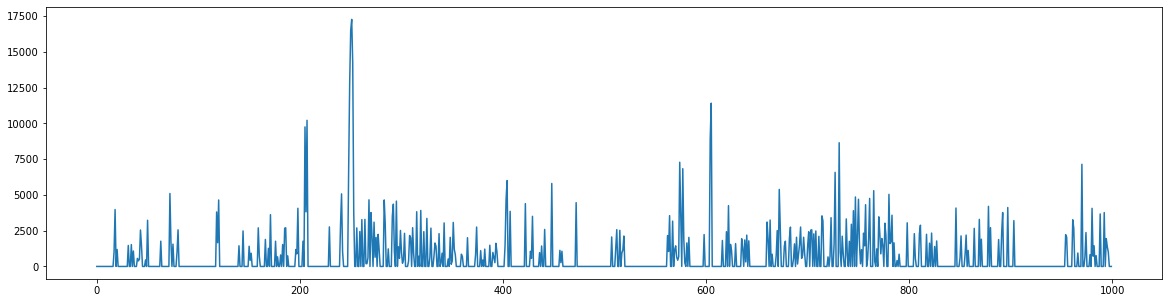

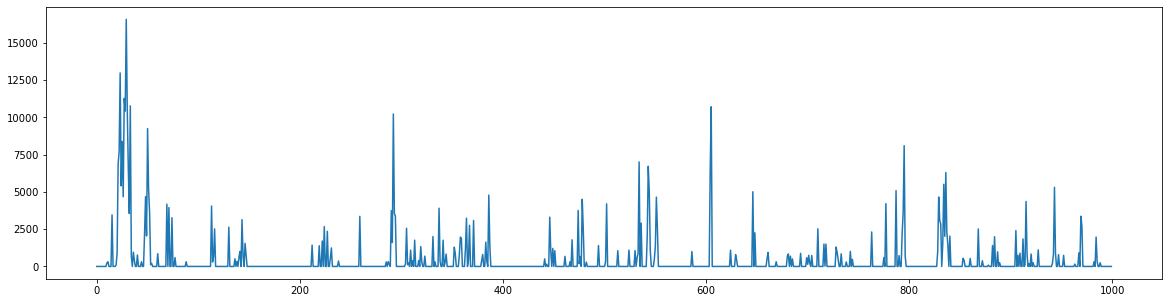

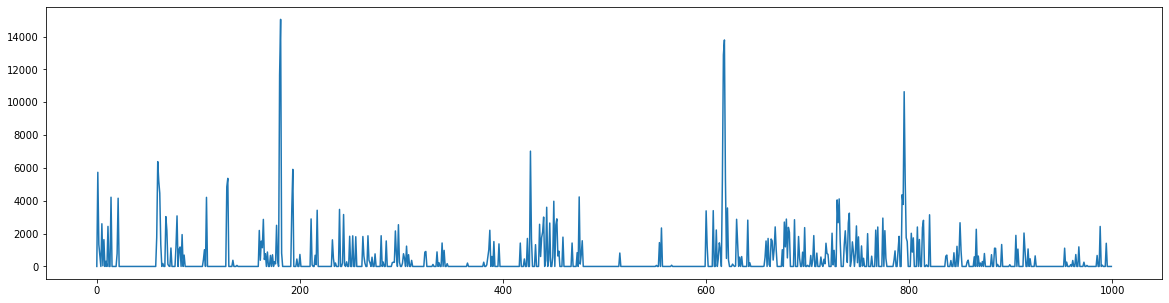

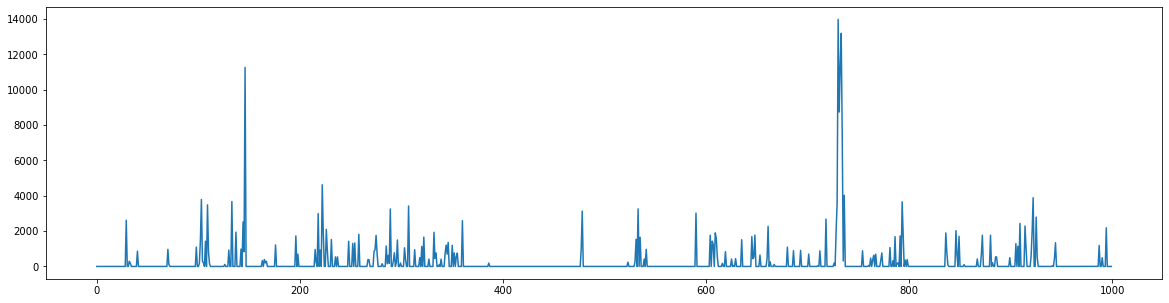

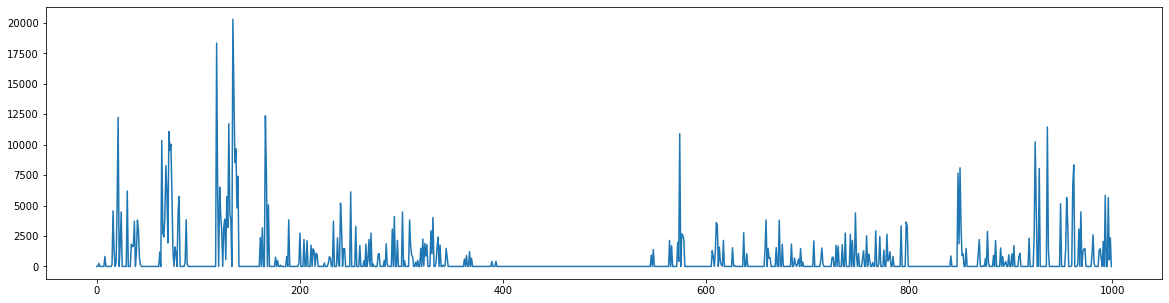

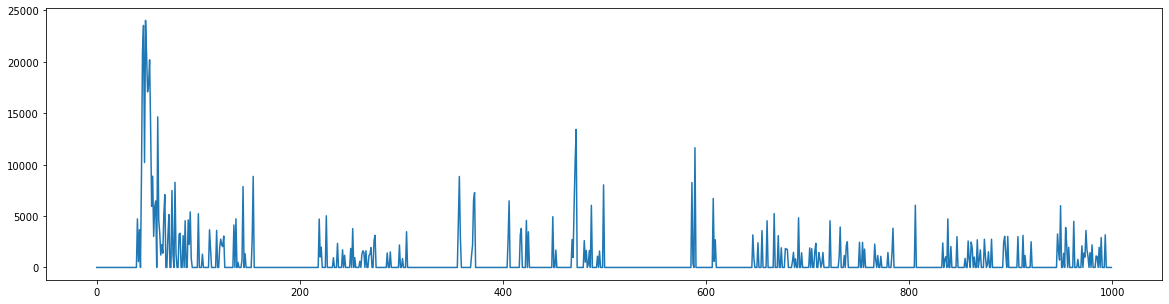

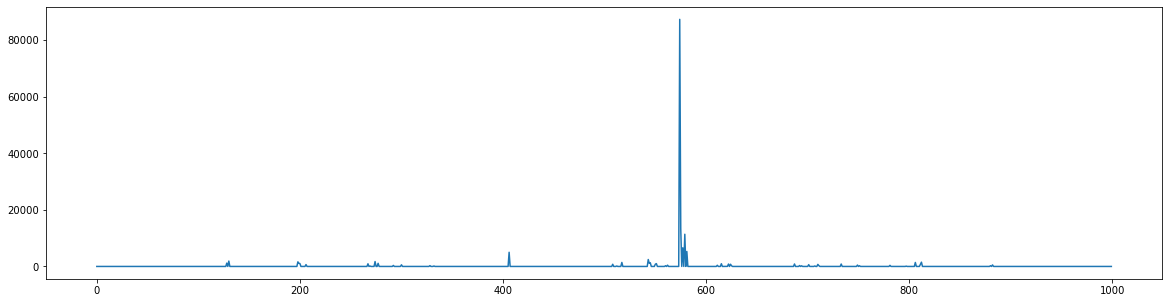

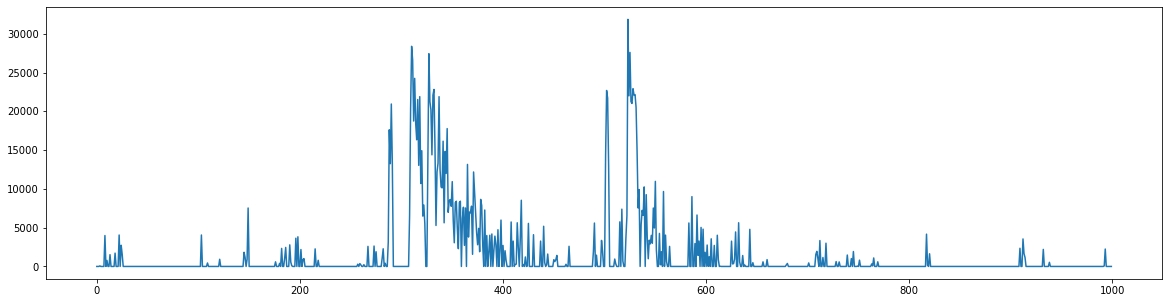

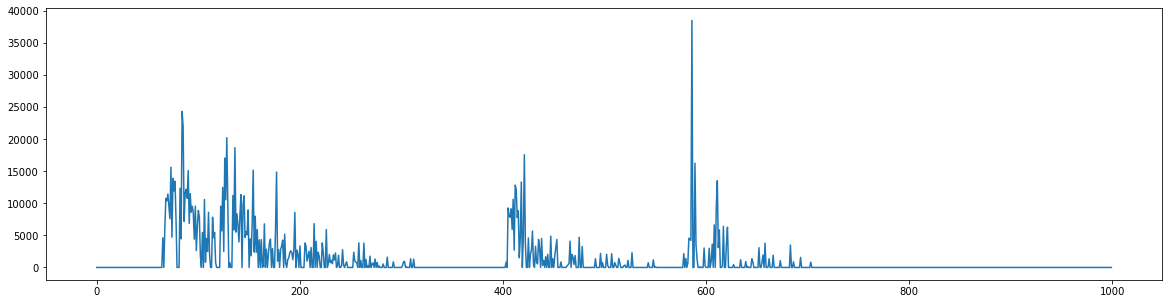

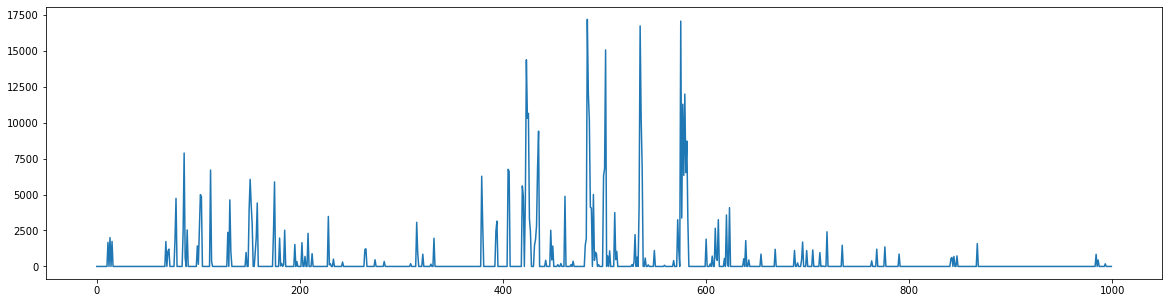

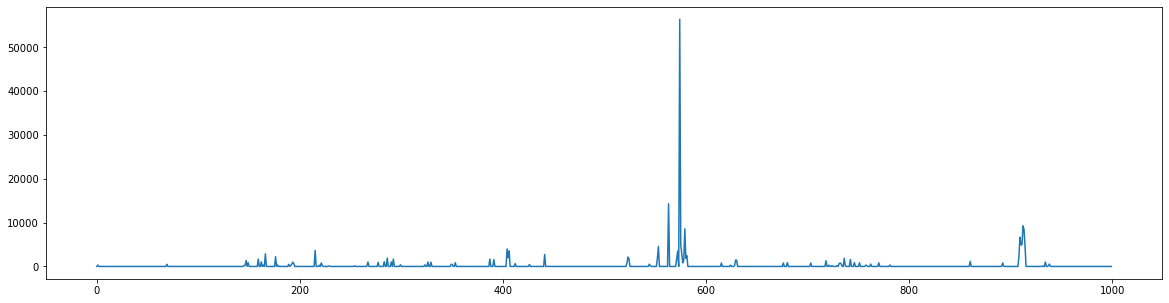

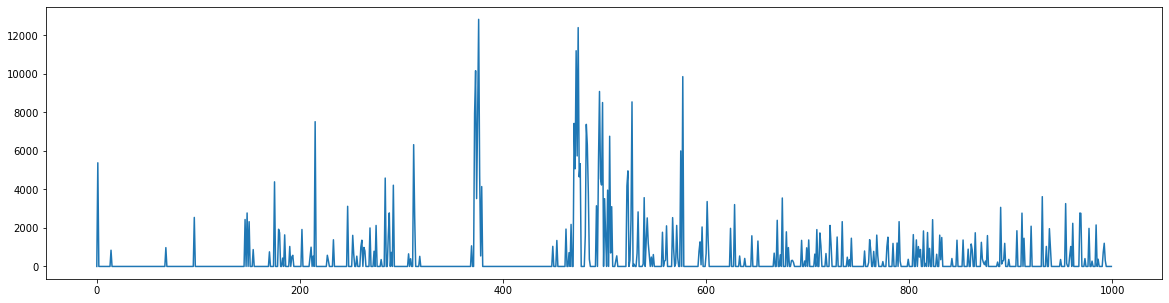

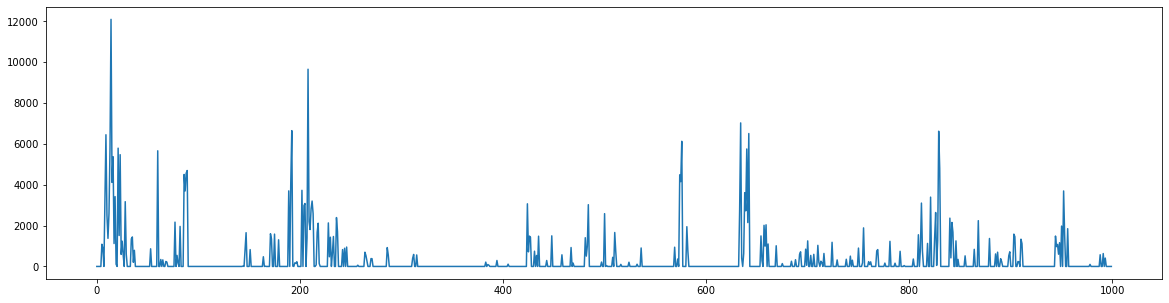

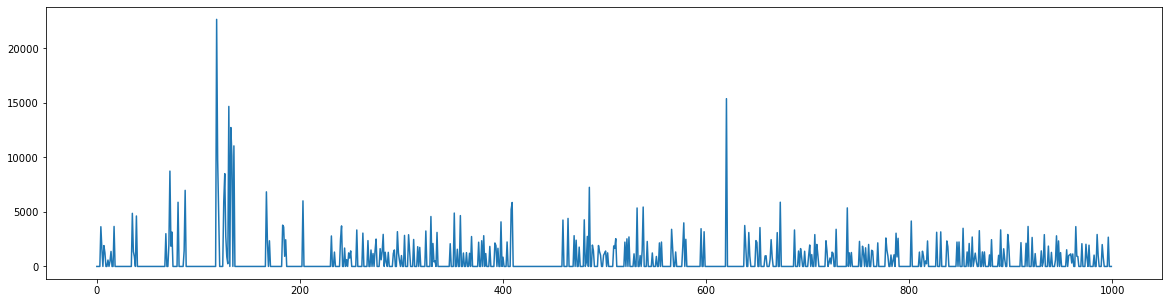

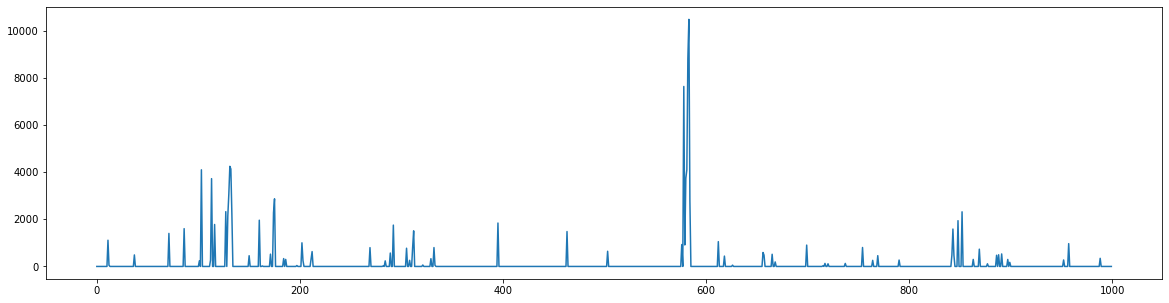

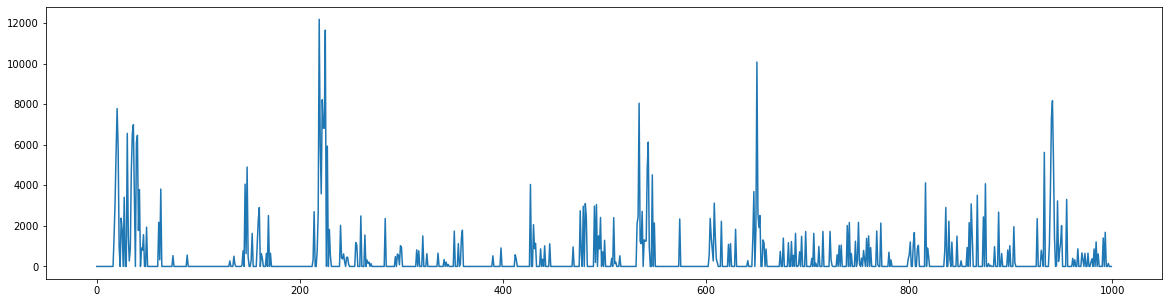

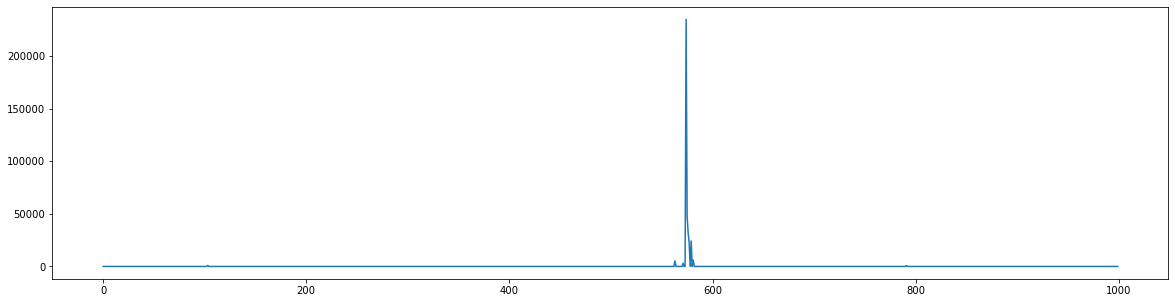

In [216]:
for i in range(len(caiman_spikes)):
    plt.figure(figsize=(20,5))
    plt.plot(caiman_spikes[i])
    plt.show()

# min1pipeのスパイク処理

In [387]:
#min1pipe
#BOM用の処理が必要

filename =r"C:\Users\natsu\Desktop\sotsuken\MIN1PIPE\1030conclution\min1pipe_spike.csv"

In [388]:
import pandas as pd

df = pd.read_csv(filename)
print(df)

           1         2         3         4            5         6         7  \
0   0.000000  0.000000  0.000000  0.000000            0  0.000000  0.000000   
1   0.000000  0.000000  0.000000  0.000000            0  0.000000  0.000000   
2   0.000000  0.000000  0.000000  0.000000            0  0.000000  0.000000   
3   0.000000  0.000000  0.000000  0.000000            0  0.000000  0.000000   
4   0.000118  0.000081  0.000000  0.000000            0  0.003082  0.003813   
5   0.000000  0.000000  0.000000  0.000000            0  0.000000  0.000000   
6   0.000000  0.000000  0.000000  0.000000            0  0.000000  0.000000   
7   0.005545  0.002796  0.000000  0.000000            0  0.000000  0.000000   
8   0.000000  0.133107  0.000000  0.000000            0  0.000000  0.000000   
9   0.031348  0.052412  0.026284  0.210650            0  0.000000  0.000000   
10  0.000000  0.000000  0.000000  0.000000            0  0.000000  0.000000   
11  0.000000  0.000000  0.000000  0.000000          

In [389]:
min1pipe_spikes = df.values
min1pipe_spikes.shape

(58, 1000)

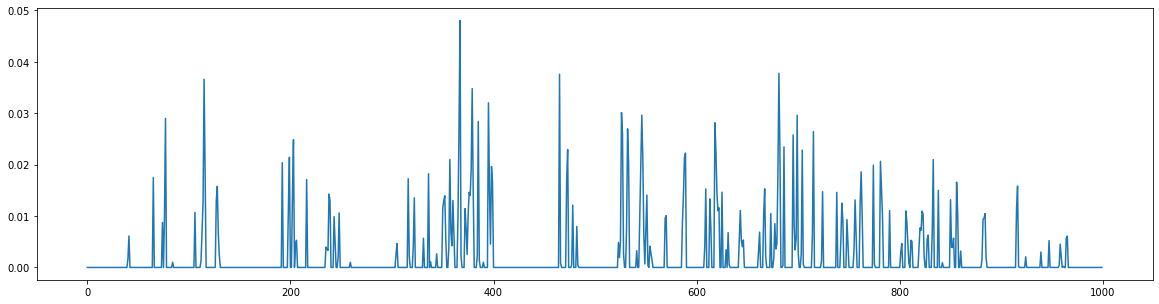

In [390]:
plt.figure(figsize=(20,5))
plt.plot(min1pipe_spikes[0])
plt.show()

In [221]:
#ハミング距離的な発想で計算する

In [228]:
boolspike = [1 for n in range(0,57)] 

#片方0であり、片方非ゼロの数を数える

def spike_distance(a,b):
    return(len([1 for n in range(len(a)) if ((a[n]==0)&(b[n]!=0))|((a[n]!=0)&(b[n]==0))] ))

In [237]:
c =[1,0,0,3,0,0]
d =[1,0,0,1,0,0]

In [331]:
print(len(min1pipe))
print(min1pipe_spikes.shape)

58
(57, 1000)


In [346]:
m =1
len([ for k in min1pipe_spikes[m]])

1000

In [356]:
def spike_dist(m,n):
    a = min1pipe_spikes[m]
    b = caiman_spikes[n]
    return len([1 for k in range(len(a)) if ((a[k]==0)&(b[k]!=0))|((a[k]!=0)&(b[k]==0))])

In [357]:
#288
spike_dist(1,4)

288

In [318]:
#comp_np = np.array([np.asarray([np.array(compare(min1pipe[n],caiman[m])) for n in range(0,58)]) for m in range(0,60)])

ham_dist = [[(spike_distance(min1pipe_spikes[m],caiman_spikes[n])) for n in range(0,61)] for m in range(0,56)]

In [319]:
haming_dist = np.asarray(ham_dist)

In [321]:
haming_dist.shape

(56, 61)

In [325]:
print(len(soted_o_distance))
print(haming_dist[0].shape)

58
(61,)


In [ ]:
やはり一距離で一番近いヤツがハミング距離で一番近いヤツとは限らない

In [273]:
k=0
l=soted_o_distance[k][0][0]
haming_dist[k][l]

388

In [286]:
min(haming_dist[n])

239

In [326]:
for n in range(0,57):
    print(n+1,soted_o_distance[n][0],soted_o_distance[n][1],soted_o_distance[n][2],soted_o_distance[n][3],soted_o_distance[n][4])
    print("   ",soted_o_distance[n][5],soted_o_distance[n][6],soted_o_distance[n][7],soted_o_distance[n][8],soted_o_distance[n][9])
    print(min(haming_dist[n]),haming_dist[n][soted_o_distance[n][0][0]],haming_dist[n][soted_o_distance[n][1][0]],haming_dist[n][soted_o_distance[n][2][0]],haming_dist[n][soted_o_distance[n][3][0]],haming_dist[n][soted_o_distance[n][4][0]],haming_dist[n][soted_o_distance[n][5][0]],haming_dist[n][soted_o_distance[n][6][0]],haming_dist[n][soted_o_distance[n][7][0]],haming_dist[n][soted_o_distance[n][8][0]],haming_dist[n][soted_o_distance[n][9][0]])

1 (30, 5.716930624973613) (7, 11.541864925347015) (26, 16.04847402402819) (23, 20.027952846101694) (34, 21.486246636373025)
    (32, 21.60186426158932) (12, 23.79741898038927) (2, 25.264908390816114) (29, 25.637260131178454) (28, 25.85259615078717)
216 350 322 356 233 292 372 300 264 385 297
2 (4, 8.18499132616984) (12, 8.407091863380533) (7, 14.48261548887935) (2, 14.942947251621888) (11, 17.042722914025347)
    (3, 22.13528721931968) (30, 22.682101509293872) (34, 28.407548402365073) (1, 30.527905771075215) (59, 31.585855333970628)
195 288 293 293 261 195 269 375 321 302 338
3 (30, 5.67777130375557) (7, 10.114622078701334) (26, 17.76735097935313) (34, 19.414912357124724) (12, 21.325585888484856)
    (23, 22.743368201292608) (32, 24.030055310103393) (4, 24.650152330476104) (2, 24.813374721013385) (33, 26.583983432269427)
170 330 260 316 310 284 191 342 261 242 307
4 (20, 26.759832544049612) (22, 39.269598265224964) (18, 44.76667814191915) (16, 45.27829738074814) (21, 50.88410758542008)

244 300 312 311 333 369 336 334 348 347 288
46 (53, 9.350099768080526) (54, 14.880991025627267) (50, 17.81650600314124) (38, 28.11492420664999) (52, 29.706276462167164)
    (58, 29.95966728296459) (55, 30.03800634439972) (57, 31.723461007788128) (37, 35.28681668053366) (56, 35.459390047889634)
142 224 188 187 235 381 158 272 322 268 278
47 (37, 9.09947579692527) (38, 9.826342860213272) (39, 12.303669879578518) (36, 18.400791047872243) (55, 28.42823634710113)
    (54, 29.61843408941833) (35, 30.030290789511646) (58, 30.554892307068435) (57, 36.2147532963278) (52, 36.708068626739625)
244 324 363 360 300 354 292 384 278 376 417
48 (20, 8.657922127241799) (22, 23.513228752107167) (16, 25.242145832869856) (18, 28.262572749762167) (21, 28.719517680933535)
    (17, 36.645336267232636) (19, 38.758293321594785) (14, 42.828290133601016) (15, 43.32476605796468) (13, 52.78778609623532)
367 414 410 413 416 433 415 453 393 386 439
49 (20, 10.466074778569999) (16, 22.856482299011407) (22, 31.73052733

IndexError: index 56 is out of bounds for axis 0 with size 56

# この辺りから距離と類似度を統合したコード

In [358]:
#スパイク単体
def spike_dist(m,n):
    a = min1pipe_spikes[m]
    b = caiman_spikes[n]
    return len([1 for k in range(len(a)) if ((a[k]==0)&(b[k]!=0))|((a[k]!=0)&(b[k]==0))])

#場所単体
def original_dist(m,n):
    """
    m:min1pipe_index,
    n:caiman_index
    """
    point=min1pipe[m]
    points=caiman[n]
    point_x = point/150 
    point_y = point%150
    points_x =[]
    points_y =[]
    D = []
    j = 0
    for i in points:
        points_x.append(int(i/150))
        points_y.append(i%150)           
        X = (points_x[j] - point_x)**2
        Y = (points_y[j] - point_y)**2 
        D.append((X + Y)**(1/2)) 
        j +=1
    return(np.mean(D)) 

In [364]:
   """
    m:min1pipe_index,
    n:caiman_index
    """
def pac_dist(m,n):
    point=min1pipe[m]
    points=caiman[n]
    point_x = point/150 
    point_y = point%150
    points_x =[]
    points_y =[]
    D = []
    j = 0
    for i in points:
        points_x.append(int(i/150))
        points_y.append(i%150)           
        X = (points_x[j] - point_x)**2
        Y = (points_y[j] - point_y)**2 
        D.append((X + Y)**(1/2)) 
        j +=1
    #--------------------------
    a = min1pipe_spikes[m]
    b = caiman_spikes[n]
    c = len([1 for k in range(len(a)) if ((a[k]==0)&(b[k]!=0))|((a[k]!=0)&(b[k]==0))])
    
    return(np.mean(D),c,m,n) 

In [405]:
type(caiman)
type(caiman_spikes)

numpy.ndarray

In [409]:
print(type(caiman_location))

<class 'scipy.sparse.csc.csc_matrix'>


In [408]:

print(type(caiman_spikes))
print(type(min1pipe))
print(type(min1pipe_spikes))

<class 'scipy.sparse.csc.csc_matrix'>
<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>


In [414]:
print(len(caiman))
print(len(caiman_spikes))
print(len(min1pipe))
print(len(min1pipe_spikes))

61
61
58
58


In [371]:
caiman_spikes.shape

(61, 1000)

In [ ]:
位置情報データとスパイクデータで数が違うぞ?? <危なかった

In [415]:
pac_dist(0,30)

(25.637260131178454, 391)

In [416]:
original_dist(0,30)

25.637260131178454

In [ ]:
min1pipe解析の位置情報データ　1から58の58個
min1pipe_spike.csvの系列データ 1から58の58個

In [427]:
two_dist = [[pac_dist(m,n) for n in range(len(caiman))] for m in range(len(min1pipe))]

In [430]:
dist_set = np.asarray(two_dist)

In [431]:
dist_set.shape

(58, 61, 2)

In [438]:
for x in range(0,61):
    print(dist_set[0][x][0])

51.788947468634795
68.01908689478991
53.15562073209685
25.264908390816114
33.6725087593364
26.453557036009443
46.57500074268581
68.94295729596136
11.541864925347015
72.28929357098595
66.78181776031022
66.47015082235966
33.90181875760077
23.79741898038927
59.305157291678526
42.28567280088772
58.92661193158088
68.54197273126435
56.03124237496791
83.03896241845749
90.357062325842
83.64241310498953
70.68566968921559
84.81463426828886
20.027952846101694
37.2438004031492
34.120736362012146
16.04847402402819
46.913861699766606
25.85259615078717
25.637260131178454
5.716930624973613
30.01133575661671
21.60186426158932
28.779793176882304
21.486246636373025
36.97900895310336
49.15868554289592
57.45368843529761
66.95353862787105
70.347919668331
42.32960293588371
63.37125280267805
52.28194712537648
44.49282227189908
73.7807019133617
64.03064025810073
59.2572011673261
31.636060297056254
35.830742889703146
55.23099147695482
64.48316711180688
39.36126649051991
45.93173881891568
73.9569610595576
59.332

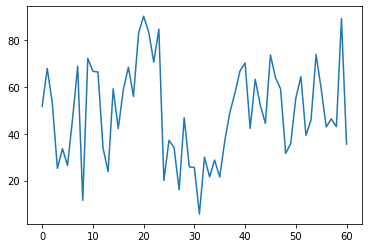

In [441]:
plt.plot(dist_set[0,:,0])
plt.show()